#<font color='blue'>**M5 FORECASTING-ACCURACY**</font>

#**EXPLORATORY DATA ANALYSIS**

####DOWNLOADING DATASETS

In [ ]:
#USING KAGGLE API TO DOWNLOAD DATA DIRECTLY FROM KAGGLE
!pip install kaggle
from google.colab import files
from datetime import datetime
api_token = files.upload()

In [ ]:
#!mkdir ~/.kaggle  #making directory named kaggle
#!cp kaggle.json ~/.kaggle/  #copying kaggle.json file in  the kaggle directory


#! kaggle competitions download -c m5-forecasting-accuracy#DOWNLOADING DATASET


!curl --header "Host: storage.googleapis.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-GB,en;q=0.9" --header "Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/18599/1236839/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1626948840&Signature=SSQ5BiEZ6Pmadghnnd5oqppi0b6P%2F5utcPz4P56WcO39%2FSNjcZ6NGvVTD3SrZ6XkO%2F1yqFy0kGzmTL%2BEZcM3h%2FcoeLeVKWFHYabFLU2oS5121z85ts4lARqSLSZ10PZMxZEFKwH3TP0%2BJ6nKwMk2M5lsLrGGV1X3IZwU%2F6zzcDFqLrjkxVxdrGiz%2FRN49MVAf3fZNV3wYqaKBjilZFrOoNkCj9Akwf0Vew6lRSwu%2BTWSWbnsaWuW7FJqnb%2FTRTiPvDt%2FcIDtKhPOXNdBO6XneU%2BKBbrmTD3Yu%2F0ALxD4ve9nT3XefbvpkkoQSEoO5w2ehjWs%2B6Zw55LaikYycXsVJg%3D%3D&response-content-disposition=attachment%3B+filename%3Dm5-forecasting-accuracy.zip" -L -o "m5-forecasting-accuracy.zip"

In [ ]:
#UNZIPPING THE DATASET
#!unzip '/content/calendar.csv'
#!unzip '/content/sales_train_evaluation.csv.zip'
#!unzip '/content/sell_prices.csv.zip'

!unzip '/content/m5-forecasting-accuracy.zip'

####LOADING DATATSETS INTO PANDAS DATAFRAME

In [ ]:
#REFERENCE-https://www.kaggle.com/priyanka4pc/m5-model
#code to reduce memory consumption
import numpy as np
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

#####LOADING AND ANALYZING CALENDAR DATASET

In [ ]:
import pandas as pd
calendar=pd.read_csv('/content/calendar.csv')

In [ ]:
#CONVERTING DATE COLUMN TO DATETIME FORMAT
import datetime as dt
calendar['date'] = calendar['date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d'))

##**CONCLUSIONS**-
    1.#REFERENCE-https://www.kaggle.com/c/m5-forecasting-accuracy/discussion/134392
    #wm_yr_yk===it represtnts the year and week for the dates..it is represented in format "yyy-nw" where yyy is year starting from 1911(ex. for year 2011 yyy will be 2011-1911=111) and nw is the week of year
    2.since the data starts from 29 january 2011 which is saturday and the wday is 1 for this day,it implies that the wday starts from saturday

In [ ]:
#converting object datatype to category
object_columns=calendar.select_dtypes('object').columns
calendar[object_columns]=calendar[object_columns].astype('category')


#reducing memory consumption
calendar=reduce_mem_usage(calendar)

In [ ]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int16         
 2   weekday       1969 non-null   category      
 3   wday          1969 non-null   int8          
 4   month         1969 non-null   int8          
 5   year          1969 non-null   int16         
 6   d             1969 non-null   category      
 7   event_name_1  162 non-null    category      
 8   event_type_1  162 non-null    category      
 9   event_name_2  5 non-null      category      
 10  event_type_2  5 non-null      category      
 11  snap_CA       1969 non-null   int8          
 12  snap_TX       1969 non-null   int8          
 13  snap_WI       1969 non-null   int8          
dtypes: category(6), datetime64[ns](1), int16(2), int8(5)
memory usage: 144.0 KB


In [ ]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


##**CONCLUSIONS FROM CALENDAR DATAFRAM**E-
    1.TOTAL NUMBER OF ROWS IS 1969 WHICH IMPLIES IT HAS DATA FROM DAY 1 TO DAY 1969
    2.TOTAL COLUMNS ARE 14
    3.THE DATE COLUMN IS OF OBJECT TYPE.IT IS CONVERTED INTO DATETIME FORMAT USING PANDAS DATETIME MODULE,IT WILL BE USEFUL IN SPLITTING DATASETS 
    4.THE COLUMNS EVENT_NAME_1,EVENT_NAME_2,EVENT_TYPE_2,_EVENT_TYPE_1 HAS MANY NON-NULL VALUES WHICH SHOULD BE DEALT WITH IF THE FEATURE HOLDS ANY IMPORTANCE IN OUT TASK.
    5.ALL THE OTHER COLUMNS DO NOT HAVE ANY NULL VALUES

#####LOADING AND ANALYZING PRICE DATASET

In [ ]:
price=pd.read_csv("/content/sell_prices.csv")
price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


###THE SELL_PRICE IS THE AVERAGE SELL_PRICE OF A ITEM OVER A WEEK.IF FOR A ITEM SELL PRICE IS NAN(AFTER MERGING AL DATAFRAME) THAT MEANS THERE ARE ITEMS WHICH ARE NOT SOLD FOR THAT WEEK AND HENCE THE PRICES ARE NOT AVAILABLE

In [ ]:
price['item_id'].value_counts()

HOUSEHOLD_1_324    2820
FOODS_3_746        2820
FOODS_3_622        2820
HOUSEHOLD_2_030    2820
FOODS_1_085        2820
                   ... 
HOUSEHOLD_1_308     642
HOUSEHOLD_1_159     623
HOUSEHOLD_1_242     600
FOODS_3_296         592
FOODS_2_379         530
Name: item_id, Length: 3049, dtype: int64

In [ ]:
price['item_id'].nunique()

3049

In [ ]:
#converting object datatype to category
object_columns=calendar.select_dtypes('object').columns
price[object_columns]=price[object_columns].astype('category')


#reducing memory consumption
price=reduce_mem_usage(price)

In [ ]:
price.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   store_id    6841121 non-null  category
 1   item_id     6841121 non-null  category
 2   wm_yr_wk    6841121 non-null  int16   
 3   sell_price  6841121 non-null  float32 
dtypes: category(2), float32(1), int16(1)
memory usage: 58.8 MB


##**CONCLUSIONS FROM PRICE DATAFRAME-**
    1.THERE ARE 6841120 ROWS EACH ROW CORRESPONDS TO SELLING PRICE(ONE OF THE FEATURE) OF AN ITEM OUT OF 3049 UNIQUE ITEMS PER STORE
    2.NO COLUMNS CONTAINS NULL VALUES.
    3.THERE ARE 4 COLUMNS

#####LOADING AND ANALYZING SALES_TRAIN_EVALUATION DATASET

In [ ]:
import pandas as pd
sales=pd.read_csv('/content/sales_train_evaluation.csv')


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB


In [ ]:
#converting object datatype to category
object_columns=calendar.select_dtypes('object').columns
sales[object_columns]=sales[object_columns].astype('category')


#reducing memory consumption
sales=reduce_mem_usage(sales)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: category(6), int16(1299), int8(642)
memory usage: 96.0 MB


In [ ]:
 sales.columns[sales.isna().any()].tolist()#checking whether any entry in dataframe is NAN

[]

##**CONCLUSIONS FROM SALE_EVALUATION DATAFRAME-**
    1.THERE ARE TOTAL 30490 ROWS EACH CONTAINING UNIT SALE DATA OF EACH ITEM UNDER ALL DEPARTMENTS,CATEGORIES, AND STORES
    2.TOTAL COLUMNS ARE 1947 CONTAINGING SALES DATA OF 1941 DAYS ALONG WITH STORE ID,ITEM ID ETC WHICH ARE SELF EXPLANATORY
    3.THERE ARE NO NULL/NAN/MISSING VALUES IN THE SALES DATA
    4.THE DATAFRAME WAS TAKING HUGE SPACE(452+MB),SO IT WAS DOWNCAST TO 95.6+ MB.

##PERFORMING EDA ON SALES_EVALUATION DATAFRAME

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


In [ ]:
#dataframe is pivoted to put all the sales data under a single column,it will help us in plotting the time series data of sale..
sales_melt=sales.melt(id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d',value_name='sale')

sales_melt['d']=sales_melt['d'].astype('category')

In [ ]:
sales_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        category
 1   item_id   category
 2   dept_id   category
 3   cat_id    category
 4   store_id  category
 5   state_id  category
 6   d         category
 7   sale      int16   
dtypes: category(7), int16(1)
memory usage: 679.0 MB


##**CONCLUSIONS-**
    1.THERE ARE 59181089 ROWS FORMED BY 30490*1941.

    2.THE DATA IMPLIES EACH ITEM SALE DATA FOR EACH DAY

    3.FIRST 30490 ROWS WILL BE SALE DATA OF EVERY ITEM FOR DAY 1....AND SO ON..AND THUS THERE WILL BE 30490*1941 ROWS.

##SALES DATA FOR EACH STATE

In [ ]:
sales_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        category
 1   item_id   category
 2   dept_id   category
 3   cat_id    category
 4   store_id  category
 5   state_id  category
 6   d         category
 7   sale      int16   
dtypes: category(7), int16(1)
memory usage: 679.0 MB


In [ ]:
sales_melt['state_id'].value_counts()

CA    23672436
WI    17754327
TX    17754327
Name: state_id, dtype: int64

##**CONCLUSIONS**-


    1.THE DATA GIVEN IS COLLECTED ONLY FROM 3 STATES OF USA WHICH ARE
    CA=CALIFORNIA
    WI=WISCONSIN
    TX=TEXAS

    2.THE DATA FOR CA IS MORE COMPARED TO OTHER TWO 

In [ ]:
#merging sales data with calendar data to plot total sales per day(in terms of date)
sales_pivot=sales_melt.merge(calendar,on='d',how='left')
sales_pivot.head()


,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0


In [ ]:
#converting column d to category datatype tp reduce memory consumption
sales_pivot['d']=sales_pivot['d'].astype('category')

In [ ]:
sales_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 59181089
Data columns (total 21 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            category      
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             category      
 7   sale          int16         
 8   date          datetime64[ns]
 9   wm_yr_wk      int16         
 10  weekday       category      
 11  wday          int8          
 12  month         int8          
 13  year          int16         
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       int8          
 19  snap_TX       int8          
 20  snap_WI       int8          
dtypes: category(12), datetime64[ns](1), int16(3), int8(5)
memory usage: 2.3 GB


In [ ]:
#creating a dataframe containing sales and date of item sold
state_ca=sales_pivot[sales_pivot['state_id']=="CA"][['date','sale']]
state_ca

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
state_ca=state_ca.groupby(['date']).sum().reset_index()
state_ca

In [ ]:
#creating a dataframe containing sales and date of item sold
state_tx=sales_pivot[sales_pivot['state_id']=="TX"][['date','sale']]
state_tx

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
state_tx=state_tx.groupby(['date']).sum().reset_index()
state_tx

In [ ]:
#creating a dataframe containing sales and date of item sold
state_wi=sales_pivot[sales_pivot['state_id']=="WI"][['date','sale']]
state_wi

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
state_wi=state_wi.groupby(['date']).sum().reset_index()
state_wi

##PLOTTING BAR PLOT OF TOTAL SALES(ALL 1941 DAYS) PER STATE

In [ ]:
state=sales_pivot['state_id'].unique()
state

['CA', 'TX', 'WI']
Categories (3, object): ['CA', 'TX', 'WI']

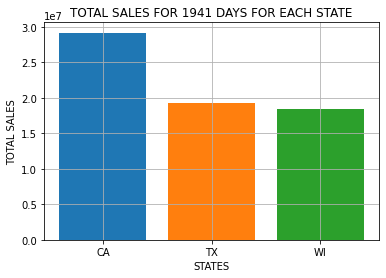

In [ ]:
plt.figure()
plt.title("TOTAL SALES FOR 1941 DAYS FOR EACH STATE")
plt.bar(x=state[0],height=state_ca['sale'].sum())
plt.bar(x=state[1],height=state_tx['sale'].sum())
plt.bar(x=state[2],height=state_wi['sale'].sum())
plt.ylabel("TOTAL SALES")
plt.xlabel("STATES")
plt.grid()
plt.show()
plt.close()


##**CONCLUSIONS DRAWN FROM THE BAR PLOT OF TOTAL SALES PER STATE-**
    1.TOTAL SALES FORM STORES IN CA(FOR 1941 DAYS) IS MORE THAT TX AND WI
    2.TX HAS MORE SALE(NOT MUCH DIFFERENCE) THAN WI

INSIGHTS LEFT TO BE ANSWERED-

    1.WHY IS TOTAL SALES OF CALIFORNIA HIGHEST AMONG THE THREE?
    2.WHY IS TEXAS AND WISCONSIN HAVE COMPARITIVELY SAME SALES?
    3.CAN WE QUANTIFY THE TOTAL SALES FOR EACH STATE?

###PLOTTING PIE CHART FOR TOTAL SALES(1941 DAYS) FOR EACH STATE

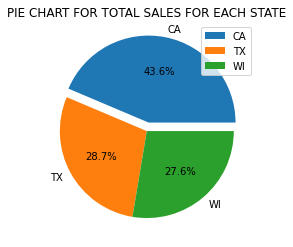

In [ ]:
#REFERENCE-https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
plt.figure()
plt.title("PIE CHART FOR TOTAL SALES FOR EACH STATE")
plt.pie(x=[state_ca['sale'].sum(),state_tx['sale'].sum(),state_wi['sale'].sum()],explode=(0.1,0,0),labels=state,autopct='%1.1f%%')
plt.legend()
plt.show()
plt.close()

##**CONCLUSIONS FROM PIE CHART OF TOTAL SALES FOR EACH STATE-**
    1.THE TOTAL SALES FOR STORES IN EACH STATE ARE IN ORDER OF
    CA>TX>WI
    2.CA GIVES 43.6% OF TOTAL SALES WHERE AS TEXAS AND WISCONSIN GIVEN 28.7% AND 27.6% SALES RESPECTIVELY..

INSIGHTS LEFT TO BE ANSWERED-

    1.WHY IS TOTAL SALES OF CALIFORNIA HIGHEST AMONG THE THREE?
    2.WHY IS TEXAS AND WISCONSIN HAVE COMPARITIVELY SAME SALES?

###PLOTTING EACH TIME SERIES ON TOP OF EACH OTHER

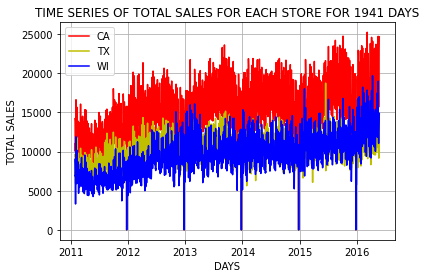

In [ ]:
#EACH TIME SERIES ON SOME PLOT
plt.figure()
plt.grid()
plt.title("TIME SERIES OF TOTAL SALES FOR EACH STORE FOR 1941 DAYS")
plt.plot(state_ca['date'],state_ca['sale'],label='CA',color='r')
plt.plot(state_tx['date'],state_tx['sale'],label='TX',color='y')
plt.plot(state_wi['date'],state_wi['sale'],label='WI',color='b')
plt.legend()
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.show()
plt.close()


##**CONCLUSIONS DRAWN FROM TOTAL SALES PER STATE V/S DAYS-**
    1.THE TOTAL SALES PER STATE FOLLOWS AN SMOOTH UPWARD TREND(NOT EXPONENTIAL)
    2.TOTAL SALES FOR STORES IN CALIFORNIA IS MORE THAN THAT OF TEXAS AND WISCONSIN.
    3.TOTAL SALES PATTERN FOR TEXAS AND WISCONSIN IS COMPARATIVELY SIMILAR AFTER 2013,BEFORE THAT SALES OF TEXAS WAS HIGHER THAN WISCONSIN
    4.THERE IS SOME DAY EVERY YEAR WHERE TOTAL SALES ARE ZERO FOR WISCONSIN(IT MAY HAPPEN THAT THE TOTAL SALES MAY ALSO BE ZERO FOR CALIFORNIA AND TEXAS AND IT IS NOT VISIBLE DUE TO OVERLAPPING)


INSIGHTS LEFT TO BE ANSWERED-


    1.WHY THE SALES OF CALIFORNIA STORES ARE HIGHERE THAN THAT OF TEXAS AND WISCONSIN?
    2.IS THE TOTAL SALES ON A CERTAIN DAY ZERO FOR EACH OF THE 3 STATE STORES OR JUST WISCONSIN?
    3.WHAT IS THE DAY WHEN TEH TOTAL SALES ARE ZERO?

###PLOTTING EACH TIME SERIES SEPERATELY

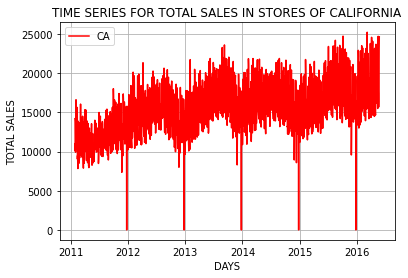

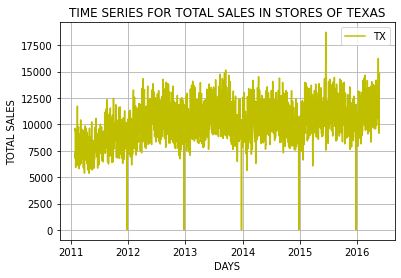

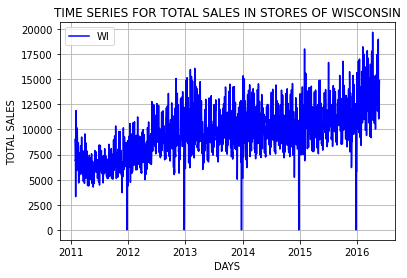

In [ ]:
fig=plt.figure()
fig.add_subplot(1,1,1)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES IN STORES OF CALIFORNIA")
plt.plot(state_ca['date'],state_ca['sale'],label='CA',color='r')
plt.legend()
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")


fig=plt.figure()
fig.add_subplot(1,1,1)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES IN STORES OF TEXAS")
plt.plot(state_tx['date'],state_tx['sale'],label='TX',color='y')
plt.legend()
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")


fig=plt.figure()
fig.add_subplot(1,1,1)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES IN STORES OF WISCONSIN")
plt.plot(state_wi['date'],state_wi['sale'],label='WI',color='b')
plt.legend()
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")


plt.show()
plt.close()

##**CONCLUSIONS DRAWN FROM TOTAL SALES PER STORE PLOTTED SEPEARTELY V/S DAYS**
    1.THE TOTAL SALES ARE INDEED ZERO FOR ALL STORES IN EACH STATES ON CERTAIN DAY OF EACH YEAR..THIS CAN BE DUE TO UNAVAILABILITY OF ITEM(IT IS LEAST PROBABLE,SINCE ALL ITEMS AT EVERY STORE IN EACH STATE EVERY YEAR CAN NOT BE AVALLABLE) OR THE STORES MUST BE CLOSED ON THAT DAY(HIGH PROBABLE,SINCE THE DAY COULD BE A NATIONAL HOLIDAY LIKE CHRISTMAS OR NEW YEAR)


INSIGHTS LEFT TO BE ANSWERED-

    1.WHY IS THE TOTAL SALES OF CALIFORNIA HIGHER THAT TEXAS AND WISCONSIN?
    2.WHAT IS THE DAY ON WHICH TOTAL SALES ARE ZERO FOR EACH STATE STORES?

###SALES DATA FOR EACH STORE

In [ ]:
sales_pivot['store_id'].value_counts()

WI_3    5918109
WI_2    5918109
WI_1    5918109
TX_3    5918109
TX_2    5918109
TX_1    5918109
CA_4    5918109
CA_3    5918109
CA_2    5918109
CA_1    5918109
Name: store_id, dtype: int64

##**CONCLUSIONS-**
    1.THERE ARE 10 STORES IN TOTAL IN 3 STATES OF USA..

    2.CALIFORNIA HAS 4 STORES AND THEREFORE THIS CAN BE THE REASON WHY THE TOTAL SALES FOR CALIFORNIA IS HIGHER THAN THAT OF TEXAS AND WISCONSIN.

    3.TEXAS AND WISCONSIN HAS 3 STORES EACH AND AS SUCH BOTH STATE HAVE SIMILAR TOTAL SALES

INSIGHTS LEFT TO BE ANSWERED-

    1.WHAT IS THE DAY ON WHICH TOTAL SALES ARE ZERO FOR EACH STATE STORES?

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_ca1=sales_pivot[sales_pivot['store_id']=='CA_1'][['date','sale']]
sales_ca1

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_ca1=sales_ca1.groupby(['date']).sum().reset_index()
sales_ca1

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_ca2=sales_pivot[sales_pivot['store_id']=='CA_2'][['date','sale']]
sales_ca2

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_ca2=sales_ca2.groupby(['date']).sum().reset_index()
sales_ca2

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_ca3=sales_pivot[sales_pivot['store_id']=='CA_3'][['date','sale']]
sales_ca3

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_ca3=sales_ca3.groupby(['date']).sum().reset_index()
sales_ca3

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_ca4=sales_pivot[sales_pivot['store_id']=='CA_4'][['date','sale']]
sales_ca4

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_ca4=sales_ca4.groupby(['date']).sum().reset_index()
sales_ca4

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_tx1=sales_pivot[sales_pivot['store_id']=='TX_1'][['date','sale']]
sales_tx1

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_tx1=sales_tx1.groupby(['date']).sum().reset_index()
sales_tx1

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_tx2=sales_pivot[sales_pivot['store_id']=='TX_2'][['date','sale']]
sales_tx2

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_tx2=sales_tx2.groupby(['date']).sum().reset_index()
sales_tx2

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_tx3=sales_pivot[sales_pivot['store_id']=='TX_3'][['date','sale']]
sales_tx3

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_tx3=sales_tx3.groupby(['date']).sum().reset_index()
sales_tx3

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_wi1=sales_pivot[sales_pivot['store_id']=='WI_1'][['date','sale']]
sales_wi1

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_wi1=sales_wi1.groupby(['date']).sum().reset_index()
sales_wi1

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_wi2=sales_pivot[sales_pivot['store_id']=='WI_2'][['date','sale']]
sales_wi2

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_wi2=sales_wi2.groupby(['date']).sum().reset_index()
sales_wi2

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_wi3=sales_pivot[sales_pivot['store_id']=='WI_3'][['date','sale']]
sales_wi3

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_wi3=sales_wi3.groupby(['date']).sum().reset_index()
sales_wi3

###PLOTTING BAR PLOT OF TOTAL SALES ON EACH STORES IN EACH STATE

In [ ]:
stores=sales_pivot['store_id'].unique()
stores

['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']

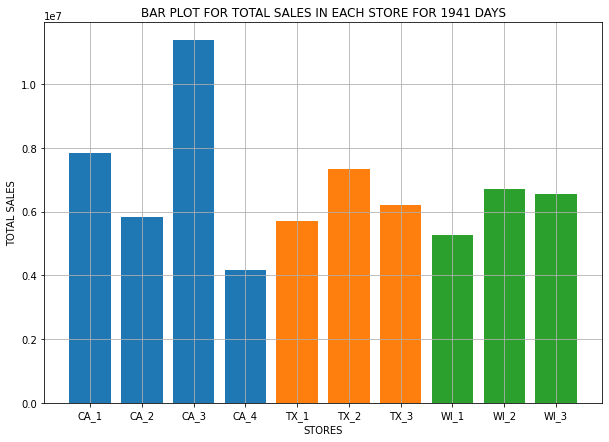

In [ ]:
plt.figure(figsize=(10,7)) 
plt.title("BAR PLOT FOR TOTAL SALES IN EACH STORE FOR 1941 DAYS")
plt.bar(x=stores[:4],height=[sales_ca1['sale'].sum(),sales_ca2['sale'].sum(),sales_ca3['sale'].sum(),sales_ca4['sale'].sum()])
plt.bar(x=stores[4:7],height=[sales_tx1['sale'].sum(),sales_tx2['sale'].sum(),sales_tx3['sale'].sum()])
plt.bar(x=stores[7:10],height=[sales_wi1['sale'].sum(),sales_wi2['sale'].sum(),sales_wi3['sale'].sum()])
plt.xlabel("STORES")
plt.ylabel("TOTAL SALES")
plt.grid()
plt.show()
plt.close()

##**CONCLUSIONS DRAWN FROM BAR PLOT OF TOTAL SALES FOR EACH STORE-**
    1.FOR STORES LOCATED IN CALIFORNIA-CA_3 HAS THE LARGEST SALE FOLLOWED BY CA_1,CA_2 AND THEN CA_4.
    2.FOR STORES LOCATED IN TEXAS TX_2 HAS HIGHEST SALE FOLLOWED BY TX_3 AND TX_2.
    3.FOR STORES LOCATED IN WISCONSIN WI_2 HAS HIGHEST SALE FOLLOWED BY WI_3 AND WI_2.
    4.THIS DIFFERENCE IN TOTAL SALES FOR STORES IN SAME STATES CAN BE DUE TO THE LOCATION OF STORES NEAR LARGE POPULATION REGIONS..THIS CAN BE ONE OF THE REASON AND SINCE WE DONT HAVE POPULATION DATA WE CAN NOT INFER OUR ASSUMPTIONS.

INSIGHTS LEFT TO BE ANSWERED-

    1.WHAT IS THE DAY ON WHICH TOTAL SALES ARE ZERO FOR EACH STATE STORES?

###PLOTTING TIME SERIES FOR STORES IN CALIFORNIA

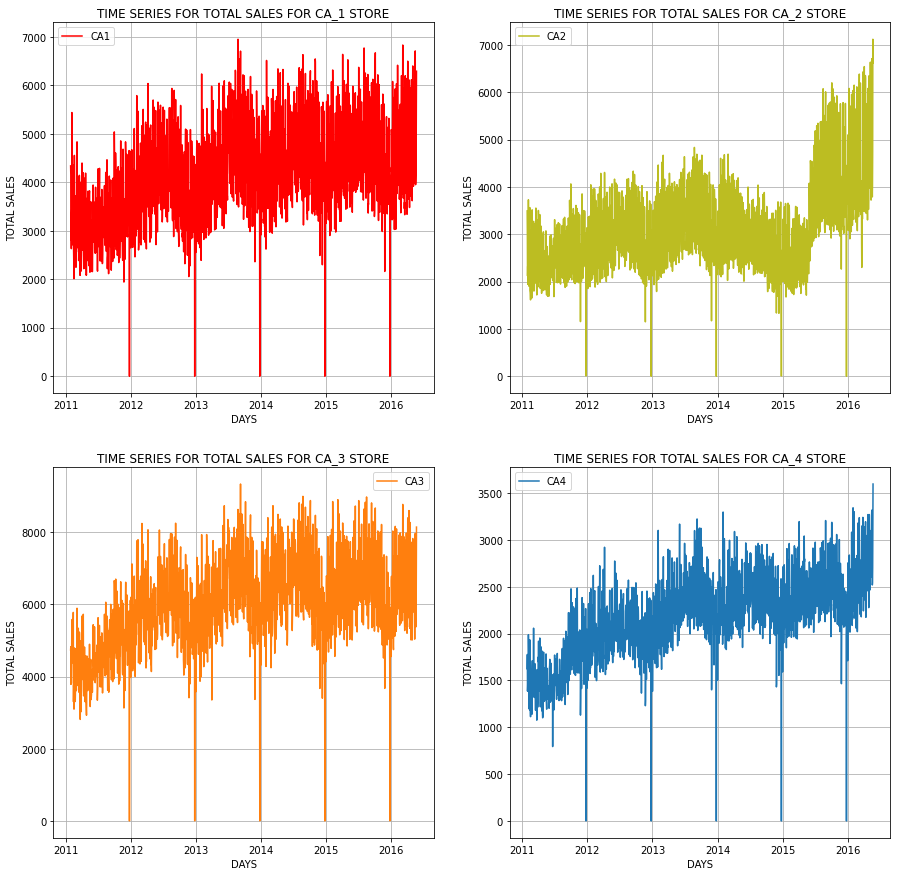

In [ ]:
fig=plt.figure(figsize=(15,15))

fig.add_subplot(2,2,1)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES FOR CA_1 STORE")
plt.plot(sales_ca1['date'],sales_ca1['sale'],label='CA1',color='r')
plt.legend()
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")


fig.add_subplot(2,2,2)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES FOR CA_2 STORE")
plt.plot(sales_ca2['date'],sales_ca2['sale'],label='CA2',color='tab:olive')
plt.legend()
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")


fig.add_subplot(2,2,3)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES FOR CA_3 STORE")
plt.plot(sales_ca3['date'],sales_ca3['sale'],label='CA3',color='tab:orange')
plt.legend()
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")


fig.add_subplot(2,2,4)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES FOR CA_4 STORE")
plt.plot(sales_ca4['date'],sales_ca4['sale'],label='CA4',color='tab:blue')
plt.legend()
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")

plt.show()
plt.close()


##**CONCLUSIONS DRAWN FROM THE TIME SERIES PLOT OF STORES LOCATED IN CALIFORNIA**-
    1.CA_1,CA_2,CA_4 FOLLOWS SMOOTH UPWARD TREND IN THE TOTAL SALE VOLUME PER DAY
    2.FOR CA_3 THE TOTAL SALES ROUGHLY FOLLOWS LINEAR TREND TILL MID 2015 AND THEN FOLLOWS SHARP UPWARD TREND..
    3.FOR EACH STORE THE TOTAL SALE VOLUME FOR A CERTAIN DAY EACH YEAR IS ZERO..A CLOSER LOOK SAYS THAT THE DAY IS AT THE VERY END OF EACH YEAR..IT CAN BE THAT THE STORES ARE CLOSED ON CHRISTMAS(WHICH FALLS ON VERY END OF YEAR) AND HENCE ZERO SALE
    4.THE DISTRIBUTON OF TOTAL SALES ACROSS ALL STORES FOR EACH DAY LOOKS SAME..

INSIGHTS YET TO BE ANSWERED-

    1.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###PLOTTING TIME SERIES OF STORES LOCATED IN TEXAS

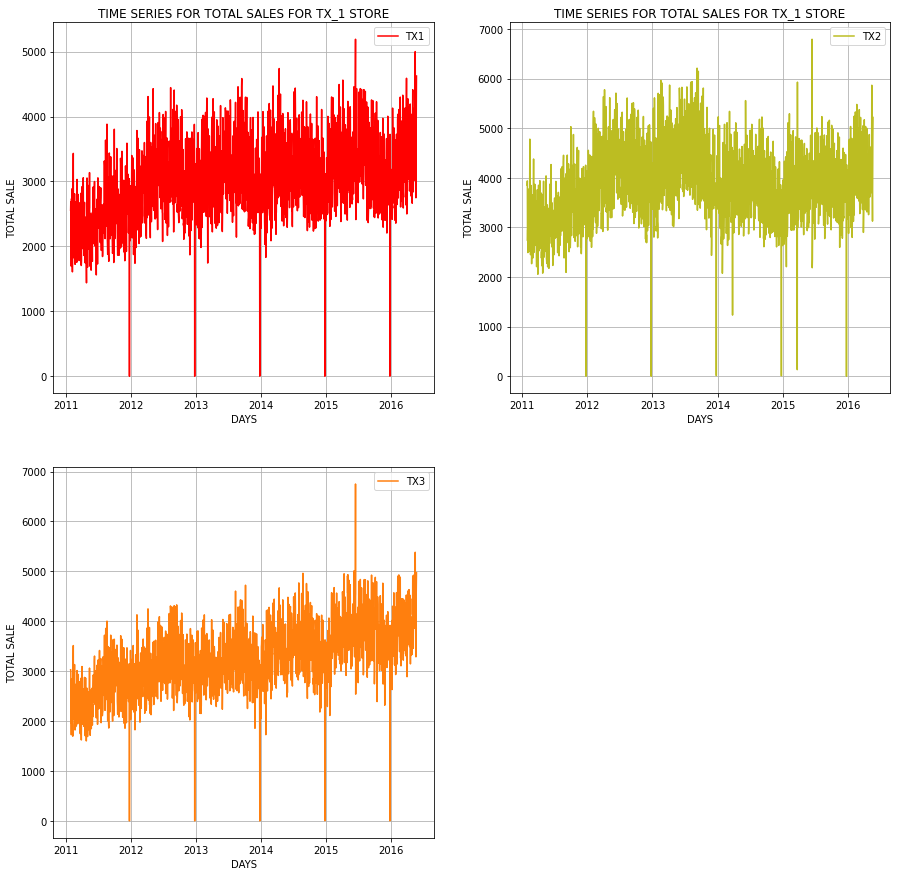

In [ ]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES FOR TX_1 STORE")
plt.plot(sales_tx1['date'],sales_tx1['sale'],label='TX1',color='r')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALE")
plt.legend()


fig.add_subplot(2,2,2)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES FOR TX_1 STORE")
plt.plot(sales_tx2['date'],sales_tx2['sale'],label='TX2',color='tab:olive')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALE")
plt.legend()


fig.add_subplot(2,2,3)
plt.grid()
plt.plot(sales_tx3['date'],sales_tx3['sale'],label='TX3',color='tab:orange')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALE")
plt.legend()

plt.show()
plt.close()


##**CONCLUSIONS DRAWN FROM TIME SERIES PLOT OF TOTAL SALES IN STORES LOCATED IN TEXAS-**
    1.THE TOTAL SALE HAS ROUGHLY SIMILAR DISTRIBUTION IN EVERY STATE WITH HIGH SALE VOLUME ON SAME DAYS
    2.SALES ARE ZERO ON CERTAIN DAYS OF EACH YEAR
    3.TOTAL SALES FOLLOWS SMOOTH UPWARD TREND

INSIGHTS YET TO BE ANSWERED-

    1.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###PLOTTING TIME SERIES FOR STORES LOCATED IN WISCONSIN

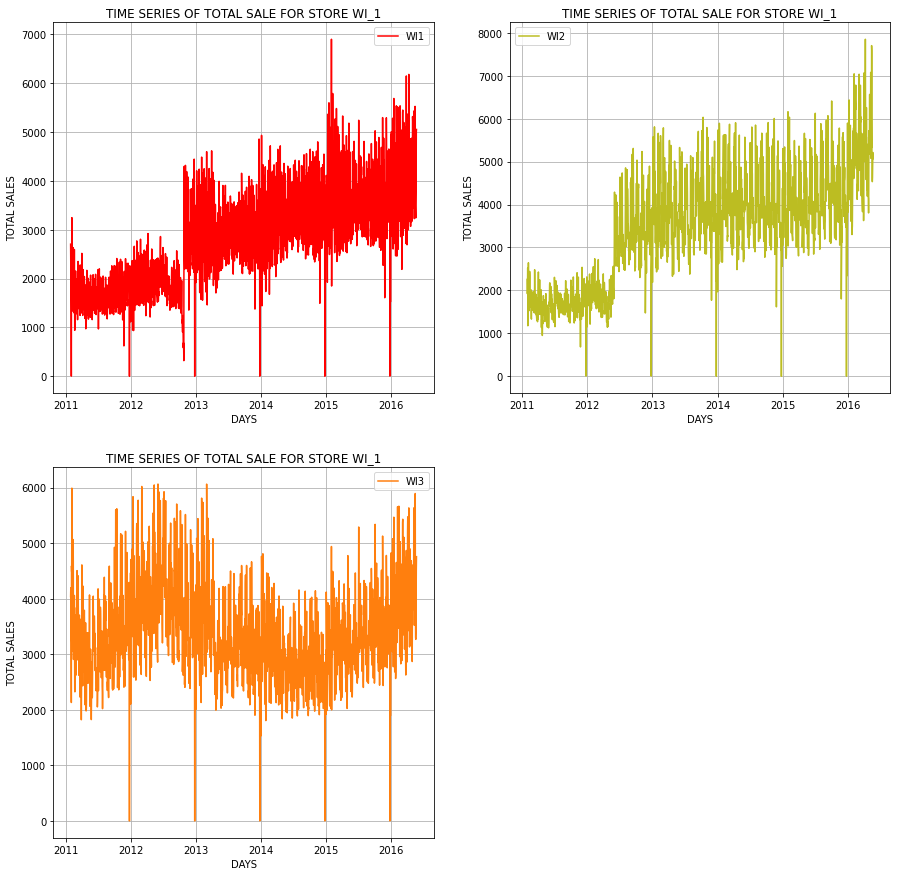

In [ ]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
plt.grid()
plt.title("TIME SERIES OF TOTAL SALE FOR STORE WI_1")
plt.plot(sales_wi1['date'],sales_wi1['sale'],label='WI1',color='r')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()



fig.add_subplot(2,2,2)
plt.grid()
plt.title("TIME SERIES OF TOTAL SALE FOR STORE WI_1")
plt.plot(sales_wi2['date'],sales_wi2['sale'],label='WI2',color='tab:olive')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()



fig.add_subplot(2,2,3)
plt.grid()
plt.title("TIME SERIES OF TOTAL SALE FOR STORE WI_1")
plt.plot(sales_wi3['date'],sales_wi3['sale'],label='WI3',color='tab:orange')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()


plt.show()
plt.close()

##**CONCLUSIONS DRAWN FROM TIME SERIES PLOT OF TOTAL SALES FOR STORES LOCATED IN WISCONSIN-**
    1.FOR STORE WI_1 AND WI_2,THERE IS LINEAR TREND TILL MID TO END 2012 ALSO SALES ARE LOWER AND THEN THE TOTAL SALE FOLLOWS UPWARD TREND
    2.FOR STORE WI_3 IT SOMEWHAT FOLLOW A ZIGZAG TREND.
    3.THERE IS CERTAIN DAY EVERY YERA WHEN SALE IS 0 FOR EACH STORE
  
INSIGHTS YET TO BE ANSWERED-

    1.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###SALES DATA FOR EACH CATEGORY

In [ ]:
sales_pivot['cat_id'].value_counts()

FOODS        27892170
HOUSEHOLD    20322270
HOBBIES      10966650
Name: cat_id, dtype: int64

##**CONCLUSIONS-**
    1.THERE ARE 3 CATEGORIES OF ITEM SOLD IN ALL STORES
    

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_food=sales_pivot[sales_pivot['cat_id']=='FOODS'][['date','sale']]
sales_food

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_food=sales_food.groupby(['date']).sum().reset_index()
sales_food

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_hobbies=sales_pivot[sales_pivot['cat_id']=='HOBBIES'][['date','sale']]
sales_hobbies

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_hobbies=sales_hobbies.groupby(['date']).sum().reset_index()
sales_hobbies

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_household=sales_pivot[sales_pivot['cat_id']=='HOUSEHOLD'][['date','sale']]
sales_household

In [ ]:
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_household=sales_household.groupby(['date']).sum().reset_index()
sales_household

###PLOTTING BAR PLOT FOR TOTAL SALES UNDER EACH CATEGORY

In [ ]:
cat=sales_pivot['cat_id'].unique()
cat

['HOBBIES', 'HOUSEHOLD', 'FOODS']
Categories (3, object): ['HOBBIES', 'HOUSEHOLD', 'FOODS']

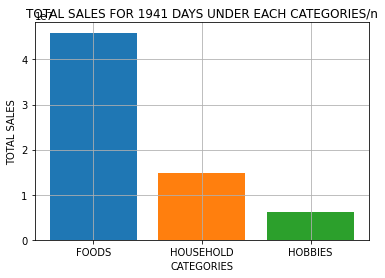

In [ ]:
plt.figure()
plt.title("TOTAL SALES FOR 1941 DAYS UNDER EACH CATEGORIES/n")
plt.bar(x=cat[2],height=sales_food['sale'].sum())
plt.bar(x=cat[1],height=sales_household['sale'].sum())
plt.bar(x=cat[0],height=sales_hobbies['sale'].sum())
plt.ylabel("TOTAL SALES")
plt.xlabel("CATEGORIES")
plt.grid()
plt.show()
plt.close()

##**CONCLUSIONS DRAWN FROM THE BAR PLOT OF TOTAL SALES UNDER EACH CATEGORY-**
    1.FOODS CATEGORY HAS THE LARGEST SALE(WELL HIGHER THAN OTHER CATEGORY SALES) AND IT WAS QUITE OBVIOUS THAT FOODS ARE THE ESSENTIAL ITEMS OF EVERYDAY NEED AND HENCE IT HAS LARGEST SALE VOLUME
    2.HOUSEHOLD SALES ARE HIGHER THAN HOBBIES SINCE HOBBIES ITEMS TEND TO BE MORE EXPENSIVE(JUST AN ASSUMPTION,WILL VALIDATE IT LATER)

INSIGHTS YET TO BE ANSWERED-

    1.WHY ITEM UNDER HOUSEHOLD ARE HIGHER THAN ITEMS UNDER HOBBIES?
    2.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    3.CAN WE QUANTIFY THE TOTAL SALES UNDER EACH CATEGORY?

###PLOTTING PIE CHART FOR TOTAL SALES OF ITEM UNDER EACH CATEGORY

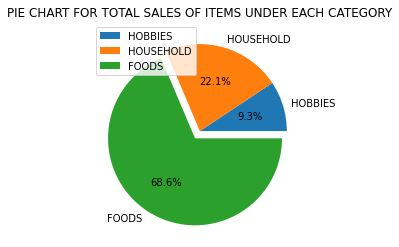

In [ ]:
plt.figure()
plt.title("PIE CHART FOR TOTAL SALES OF ITEMS UNDER EACH CATEGORY")
plt.pie(x=[sales_hobbies['sale'].sum(),sales_household['sale'].sum(),sales_food['sale'].sum()],explode=(0,0,0.1),labels=cat,autopct='%1.1f%%')
plt.legend(loc=2)
plt.show()
plt.close()

##**CONCLUSIONS DRAWN FROM BAR PLOT OF TOTAL SALES OF ITEMS UNDER EACH CATEGORY-**
    1.68.6% OF TOTAL ITEMS SOLD BELONGS TO FOODS CATEGORY..
    2.HOBBIES SELLS LOWEST ITEMS 9.3%

INSIGHTS YET TO BE ANSWERED-

    1.WHY ITEM UNDER HOUSEHOLD ARE HIGHER THAN ITEMS UNDER HOBBIES AND ITEMS UNDER FOODS HAVE LARGEST SALE?
    2.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###PLOTTING TIME SERIES OF TOTAL SALES OF ITEMS UNDER EACH CATEGORY

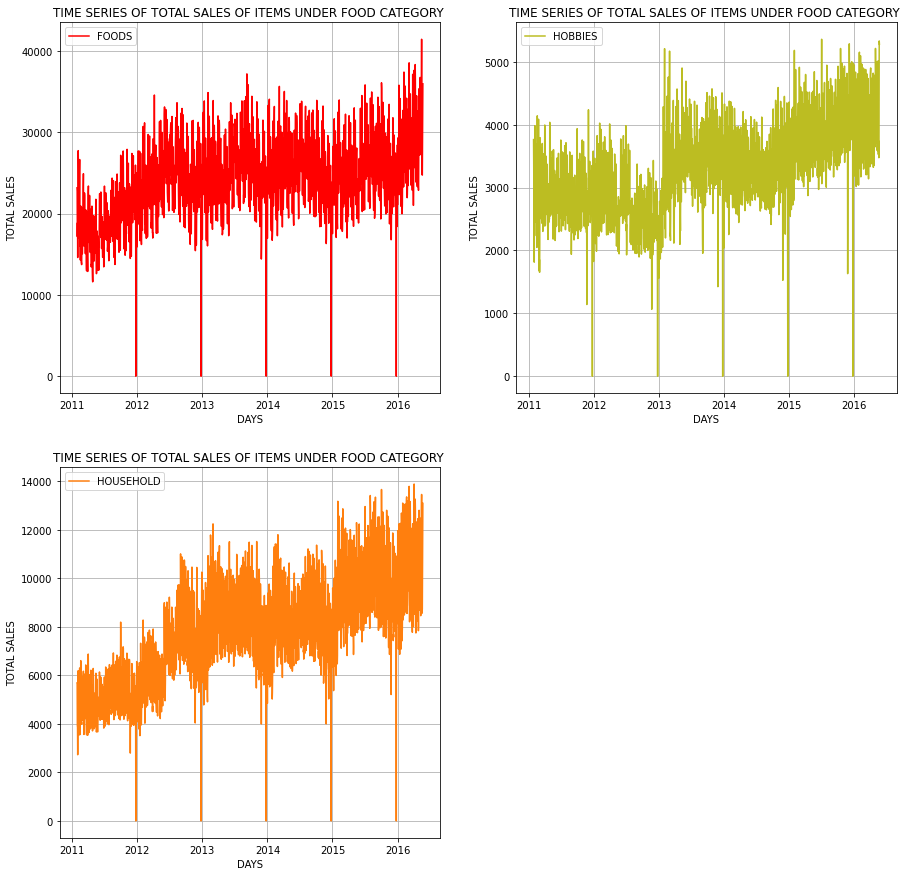

In [ ]:
fig=plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
plt.grid()
plt.title("TIME SERIES OF TOTAL SALES OF ITEMS UNDER FOOD CATEGORY ")
plt.plot(sales_food['date'],sales_food['sale'],label='FOODS',color='r')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()


fig.add_subplot(2,2,2)
plt.grid()
plt.title("TIME SERIES OF TOTAL SALES OF ITEMS UNDER FOOD CATEGORY ")
plt.plot(sales_hobbies['date'],sales_hobbies['sale'],label='HOBBIES',color='tab:olive')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()


fig.add_subplot(2,2,3)
plt.grid()
plt.title("TIME SERIES OF TOTAL SALES OF ITEMS UNDER FOOD CATEGORY ")
plt.plot(sales_household['date'],sales_household['sale'],label='HOUSEHOLD',color='tab:orange')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()

plt.show()
plt.close()

##**CONCLUSIONS-**
    1.FOODS AND HOBBIES ITEMS HAVE SIMILAR SMOOTH UPWARD TREND
    2.FOR HOBBIE THERE IS SLIGHT DIP FOR ITEMS UNDER HOUSEHOLD CATEGORY IN MID 2013..
    3.THERE IS CERTAIN DAY EVERY YEAR WHEN SALE IS 0 FOR EACH STORE
  
INSIGHTS YET TO BE ANSWERED-

    1.WHY ITEM UNDER HOUSEHOLD ARE HIGHER THAN ITEMS UNDER HOBBIES AND ITEMS UNDER FOODS HAVE LARGEST SALE?
    2.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###SALES UNDER EACH DEPARTMENT

In [ ]:
sales_pivot['dept_id'].value_counts()

FOODS_3        15974430
HOUSEHOLD_1    10326120
HOUSEHOLD_2     9996150
HOBBIES_1       8074560
FOODS_2         7725180
FOODS_1         4192560
HOBBIES_2       2892090
Name: dept_id, dtype: int64

##**CONCLUSIONS-**
    1.THERE ARE TOTAL 7 DEPARTMENTS..3 UNDER FOODS CATEGORY,2 UNDER EACH HOBBIES AND HOUSEHOLD..
    2.SINCE THERE ARE 3 DEPARTMENTS UNDER FOODS CATEGORY AND HENCE IT HAS THE LARGEST SALES
    3.CATEGORY HOBBIES AND HOUSEHOLD BOTH HAVE 2 DEPARTMENTS UNDER IT AND HENCE HAVE LOWER SALES THAN HOBBIES.

FOR SALES UNDER EACH DEPARTMENT

In [ ]:
#creating a dataframe containing sales and date of item sold
sales_food1=sales_pivot[sales_pivot['dept_id']=='FOODS_1'][['date','sale']]
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_food1=sales_food1.groupby(['date']).sum().reset_index()


#creating a dataframe containing sales and date of item sold
sales_food2=sales_pivot[sales_pivot['dept_id']=='FOODS_2'][['date','sale']]
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_food2=sales_food2.groupby(['date']).sum().reset_index()


#creating a dataframe containing sales and date of item sold
sales_food3=sales_pivot[sales_pivot['dept_id']=='FOODS_3'][['date','sale']]
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_food3=sales_food3.groupby(['date']).sum().reset_index()

#creating a dataframe containing sales and date of item sold
sales_hobbies1=sales_pivot[sales_pivot['dept_id']=='HOBBIES_1'][['date','sale']]
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_hobbies1=sales_hobbies1.groupby(['date']).sum().reset_index()


#creating a dataframe containing sales and date of item sold
sales_hobbies2=sales_pivot[sales_pivot['dept_id']=='HOBBIES_2'][['date','sale']]
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_hobbies2=sales_hobbies2.groupby(['date']).sum().reset_index()


#creating a dataframe containing sales and date of item sold
sales_household1=sales_pivot[sales_pivot['dept_id']=='HOUSEHOLD_1'][['date','sale']]
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_household1=sales_household1.groupby(['date']).sum().reset_index()



#creating a dataframe containing sales and date of item sold
sales_household2=sales_pivot[sales_pivot['dept_id']=='HOUSEHOLD_2'][['date','sale']]
#grouping the sale column as per date column and taking the sum of sales per group..This will give us total sales on each day
sales_household2=sales_household2.groupby(['date']).sum().reset_index()


###PLOTTING STACKED BARPLOT OF TOTAL SALES UNDER EACH DEPARTMENT

In [ ]:
dept=sales_pivot['dept_id'].unique()
dept

['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1', 'FOODS_2', 'FOODS_3']
Categories (7, object): ['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
                         'FOODS_2', 'FOODS_3']

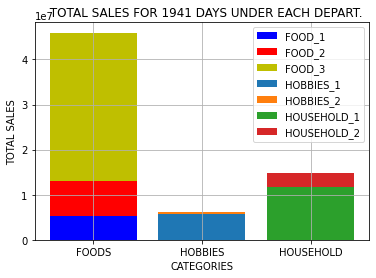

In [ ]:
plt.figure()
plt.title("  TOTAL SALES FOR 1941 DAYS UNDER EACH DEPART.")
plt.bar(x=cat[2],height=sales_food1['sale'].sum(),color='b')
plt.bar(x=cat[2],height=sales_food2['sale'].sum(),color='r',bottom=sales_food1['sale'].sum())
plt.bar(x=cat[2],height=sales_food3['sale'].sum(),color='y',bottom=sales_food2['sale'].sum()+sales_food1['sale'].sum())

plt.bar(x=cat[0],height=sales_hobbies1['sale'].sum())
plt.bar(x=cat[0],height=sales_hobbies2['sale'].sum(),bottom=sales_hobbies1['sale'].sum())

plt.bar(x=cat[1],height=sales_household1['sale'].sum())
plt.bar(x=cat[1],height=sales_household2['sale'].sum(),bottom=sales_household1['sale'].sum())

plt.legend(['FOOD_1','FOOD_2','FOOD_3','HOBBIES_1','HOBBIES_2','HOUSEHOLD_1','HOUSEHOLD_2'])

plt.ylabel("TOTAL SALES")
plt.xlabel("CATEGORIES")
plt.grid()

plt.show()
plt.close()

##**CONCLUSIONS DRAWN FROM STACKED BARPLOT OF TOTAL SALES PER DEPARTMENT FOR EACH CATEGORIES-**
    1.FOOD_3 DEPT. HAS THE LARGEST SALES FOLLOWED BY FOODS_2 AND THEN FOODS_1
    2.HOBBIES_1 HAS MUCH LARGER SALES VOLUME THAN HOBBIES_2
    3.HOUSEHOLD_1 HAS MUCH LARGER SALES VOLUME THAN HOUSEHOLD_2

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    4.CAN WE QUANTIFY THE TOTAL SALES UNDER EACH DEPARTMENT?

###PLOTTING PIE CHART OF TOTAL SALES PER DEPARTMENT

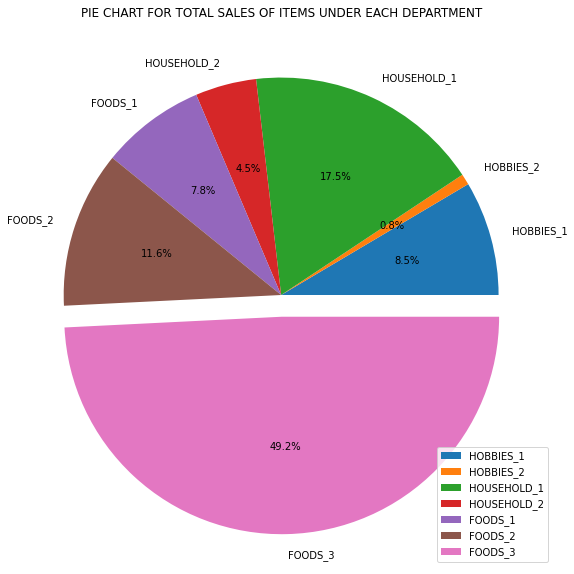

In [ ]:
plt.figure(figsize=(10,10))
plt.title("PIE CHART FOR TOTAL SALES OF ITEMS UNDER EACH DEPARTMENT")
plt.pie(x=[sales_hobbies1['sale'].sum(),sales_hobbies2['sale'].sum(),sales_household1['sale'].sum(),sales_household2['sale'].sum(),sales_food1['sale'].sum(),sales_food2['sale'].sum(),sales_food3['sale'].sum()],explode=(0,0,0,0,0,0,0.1),labels=dept,autopct='%1.1f%%')
plt.legend(loc=4)
plt.show()
plt.close()

##**CONCLUSIONS DRAWN FROM THE PIE CHART OF TOTAL SALES OF ITEMS PER DEPARTMENT-**
    1.FOR DEPARTMENTS UNDER FOOD CATEGORY THE TOTAL SALES FOLLOWS ORDER FOODS_3>FOODS_2>FOODS_1

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    3.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    

###PLOTTING TIME SERIES PLOT OF TOTAL SALES OF ITEMS UNDER EACH DEPARTMENT

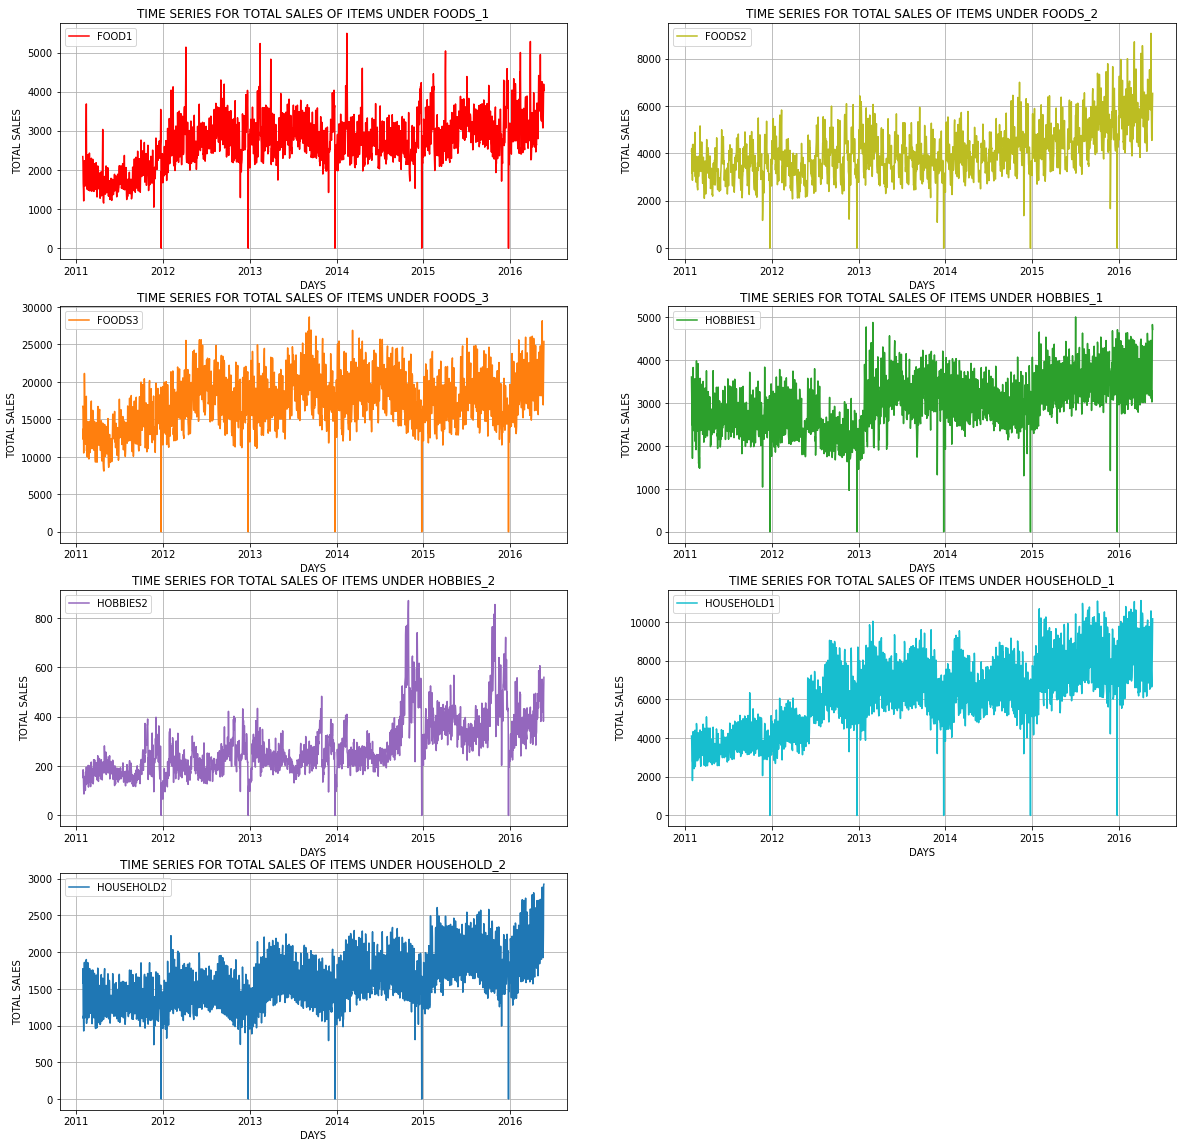

In [ ]:
fig=plt.figure(figsize=(20,20))
fig.add_subplot(4,2,1)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES OF ITEMS UNDER FOODS_1")
plt.plot(sales_food1['date'],sales_food1['sale'],label='FOOD1',color='r')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()


fig.add_subplot(4,2,2)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES OF ITEMS UNDER FOODS_2")
plt.plot(sales_food2['date'],sales_food2['sale'],label='FOODS2',color='tab:olive')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()


fig.add_subplot(4,2,3)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES OF ITEMS UNDER FOODS_3")
plt.plot(sales_food3['date'],sales_food3['sale'],label='FOODS3',color='tab:orange')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()

fig.add_subplot(4,2,4)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES OF ITEMS UNDER HOBBIES_1")
plt.plot(sales_hobbies1['date'],sales_hobbies1['sale'],label='HOBBIES1',color='tab:green')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()


fig.add_subplot(4,2,5)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES OF ITEMS UNDER HOBBIES_2")
plt.plot(sales_hobbies2['date'],sales_hobbies2['sale'],label='HOBBIES2',color='tab:purple')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()


fig.add_subplot(4,2,6)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES OF ITEMS UNDER HOUSEHOLD_1")
plt.plot(sales_household1['date'],sales_household1['sale'],label='HOUSEHOLD1',color='tab:cyan')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()


fig.add_subplot(4,2,7)
plt.grid()
plt.title("TIME SERIES FOR TOTAL SALES OF ITEMS UNDER HOUSEHOLD_2")
plt.plot(sales_household2['date'],sales_household2['sale'],label='HOUSEHOLD2',color='tab:blue')
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")
plt.legend()

plt.show()
plt.close()

##**CONCLUSIONS**-
    1.FOODS DEPARTMENTS HAVE SMOOTH UPWARD TREND

    3.HOBBIES1 HAS LARGE SALES AT END 2014 AND HOBBIES 2 HAVE A SUDDEN INCREASE IN MID 2012 AND THEN NORMALISES TO SMOOTH UPWARD TREND

    4.HOUSEHOLD1 AND HOUSEHOLD 2 HAVE SMOOTH LINEAR UPWARD TREND WITH LOW SALES TILL MID 2012 IN HOUSEHOLD 1 AND THEN SUDDEN INCREASE AND THEN SMOOTH UPWARD TREND

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###PLOTTING TOTAL SALES DATA AT EACH DAY OF MONTH FOR EVERY YEAR

In [ ]:
#REFERENCE-https://stackoverflow.com/questions/44908383/how-can-i-group-by-month-from-a-date-field-using-python-pandas

sales_month=sales_pivot[['date','sale']]
sales_month_day=sales_month.groupby(sales_month['date'].dt.day).sum().reset_index()
#REFERENCE-https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas
sales_month_day.rename(columns={'date':'day_of_month'},inplace=True)
sales_month_day

,day_of_month,sale
0,1,2317228.0
1,2,2364733.0
2,3,2486741.0
3,4,2215163.0
4,5,2327704.0
5,6,2361177.0
6,7,2300398.0
7,8,2290633.0
8,9,2371790.0
9,10,2247051.0


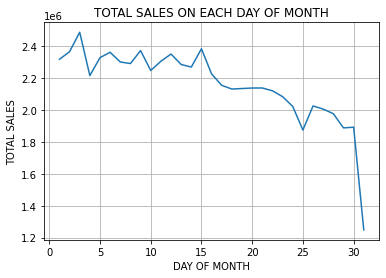

In [ ]:
plt.figure()
plt.grid()
plt.title('TOTAL SALES ON EACH DAY OF MONTH')
plt.plot(sales_month_day['day_of_month'],sales_month_day['sale'])
plt.xlabel("DAY OF MONTH")
plt.ylabel("TOTAL SALES")

plt.show()
plt.close()

##**CONCLUSIONS FROM PLOT OF TOTAL SALES ON EACH DAY OF MONTH FOR EVERY YEAR-**
    1.SALES AT THE STARTING OF MONTH ARE HIGHER AND AT THE END OF THE MONTH THE SALES ARE LOW
    2.SALES FOR 15 DAYS REMAINS ROUGHLY SAME AND AFTER THAT IT DECRESES

    REASON-ONE REASON(JUST AS ASSUMPTION SINCE THE DATA IS NOT SUFFICIENT TO DEDUCE THIS) CAN BE THAT AT STARTING OF EACH MONTH,PEOPLE GET THEIR SALARY AND HENCE THEY TEND TO SHOP MORE AND WITH PASSING DAY THE SALES DECREASES AS PURCHASE POWER OF PEOPLE DECREASES..


INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###PLOTTING SALES DATA FOR A MONTH OF A YEAR

In [ ]:
sales_month1=sales_pivot[(sales_pivot['month']==5) & (sales_pivot['year']==2011)][['date','sale']]
sales_month1=sales_month1.groupby(sales_month1['date']).sum().reset_index()
sales_month1

,date,sale
0,2011-05-01,29045
1,2011-05-02,22837
2,2011-05-03,24080
3,2011-05-04,20761
4,2011-05-05,21184
5,2011-05-06,24486
6,2011-05-07,28412
7,2011-05-08,23688
8,2011-05-09,25024
9,2011-05-10,22231


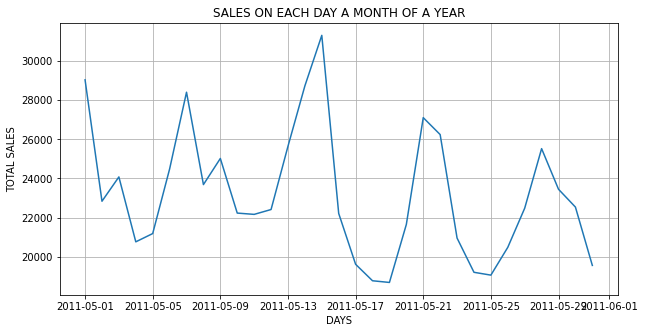

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
plt.title("SALES ON EACH DAY A MONTH OF A YEAR")
plt.plot(sales_month1['date'],sales_month1['sale'])
plt.xlabel("DAYS")
plt.ylabel("TOTAL SALES")

plt.show()
plt.close()

##**CONCLUSIONS FROM PLOT OF SALES ON MONTH A YEAR-**
    1.THE SALES DATA CAN BE THOUGHT OF HAVING A WEEKLY SEASONAL TRAIT WITH SALES HIGH ON WEEKENDS AND THEN LOW ON WEEKDAYS

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###PLOTTING SALES DATA PER WEEK EVERY YEAR

In [ ]:
sales_weekly=sales_pivot[['wday','sale']]
sales_weekly=sales_weekly.groupby(sales_weekly['wday']).sum().reset_index()
sales_weekly

,wday,sale
0,1,11594343.0
1,2,11482526.0
2,3,9139596.0
3,4,8448634.0
4,5,8346126.0
5,6,8398928.0
6,7,9517020.0


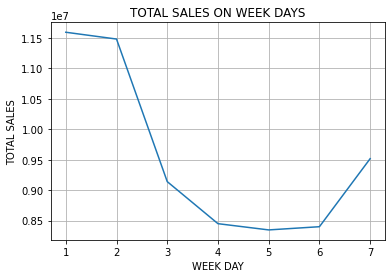

In [ ]:
plt.figure()
plt.grid()
plt.title('TOTAL SALES ON WEEK DAYS')
plt.plot(sales_weekly['wday'],sales_weekly['sale'])
plt.xlabel("WEEK DAY")
plt.ylabel("TOTAL SALES")

plt.show()
plt.close()

##**CONCLUSIONS FROM PLOT OF TOTAL SALES PER WEEKDAY-**
    1.SALES ARE HIGHER ON WEEKENDS I.E.,ON SATURDAY AND SUNDAYS
    2.ON WEEK DAYS SALES ARE LOWER AND ON FRIDAY NIGHT SALES ARE HIGHER COMPARED TO OTHER WEEK DAYS..

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###HERE IN THE GIVEN DATA THE WDAY STARTS FROM SATURDAY SO FOR SATURDAY WDAY=1 AND SO ON..

###PERFORMING EDA ON CALENDAR DATAFRAME

In [ ]:
#importing some needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
calendar['event_name_1'].dropna().value_counts()

MemorialDay            6
Mother's day           6
LentStart              6
SuperBowl              6
StPatricksDay          6
Ramadan starts         6
Purim End              6
PresidentsDay          6
Pesach End             6
LentWeek2              6
ValentinesDay          6
NBAFinalsStart         6
NBAFinalsEnd           6
Eid al-Fitr            5
ColumbusDay            5
Easter                 5
Halloween              5
Cinco De Mayo          5
Christmas              5
EidAlAdha              5
VeteransDay            5
IndependenceDay        5
LaborDay               5
MartinLutherKingDay    5
NewYear                5
OrthodoxChristmas      5
OrthodoxEaster         5
Thanksgiving           5
Chanukah End           5
Father's day           4
Name: event_name_1, dtype: int64

###PLOTTING HISTOGRAM FOR EVENTS_NAME_1

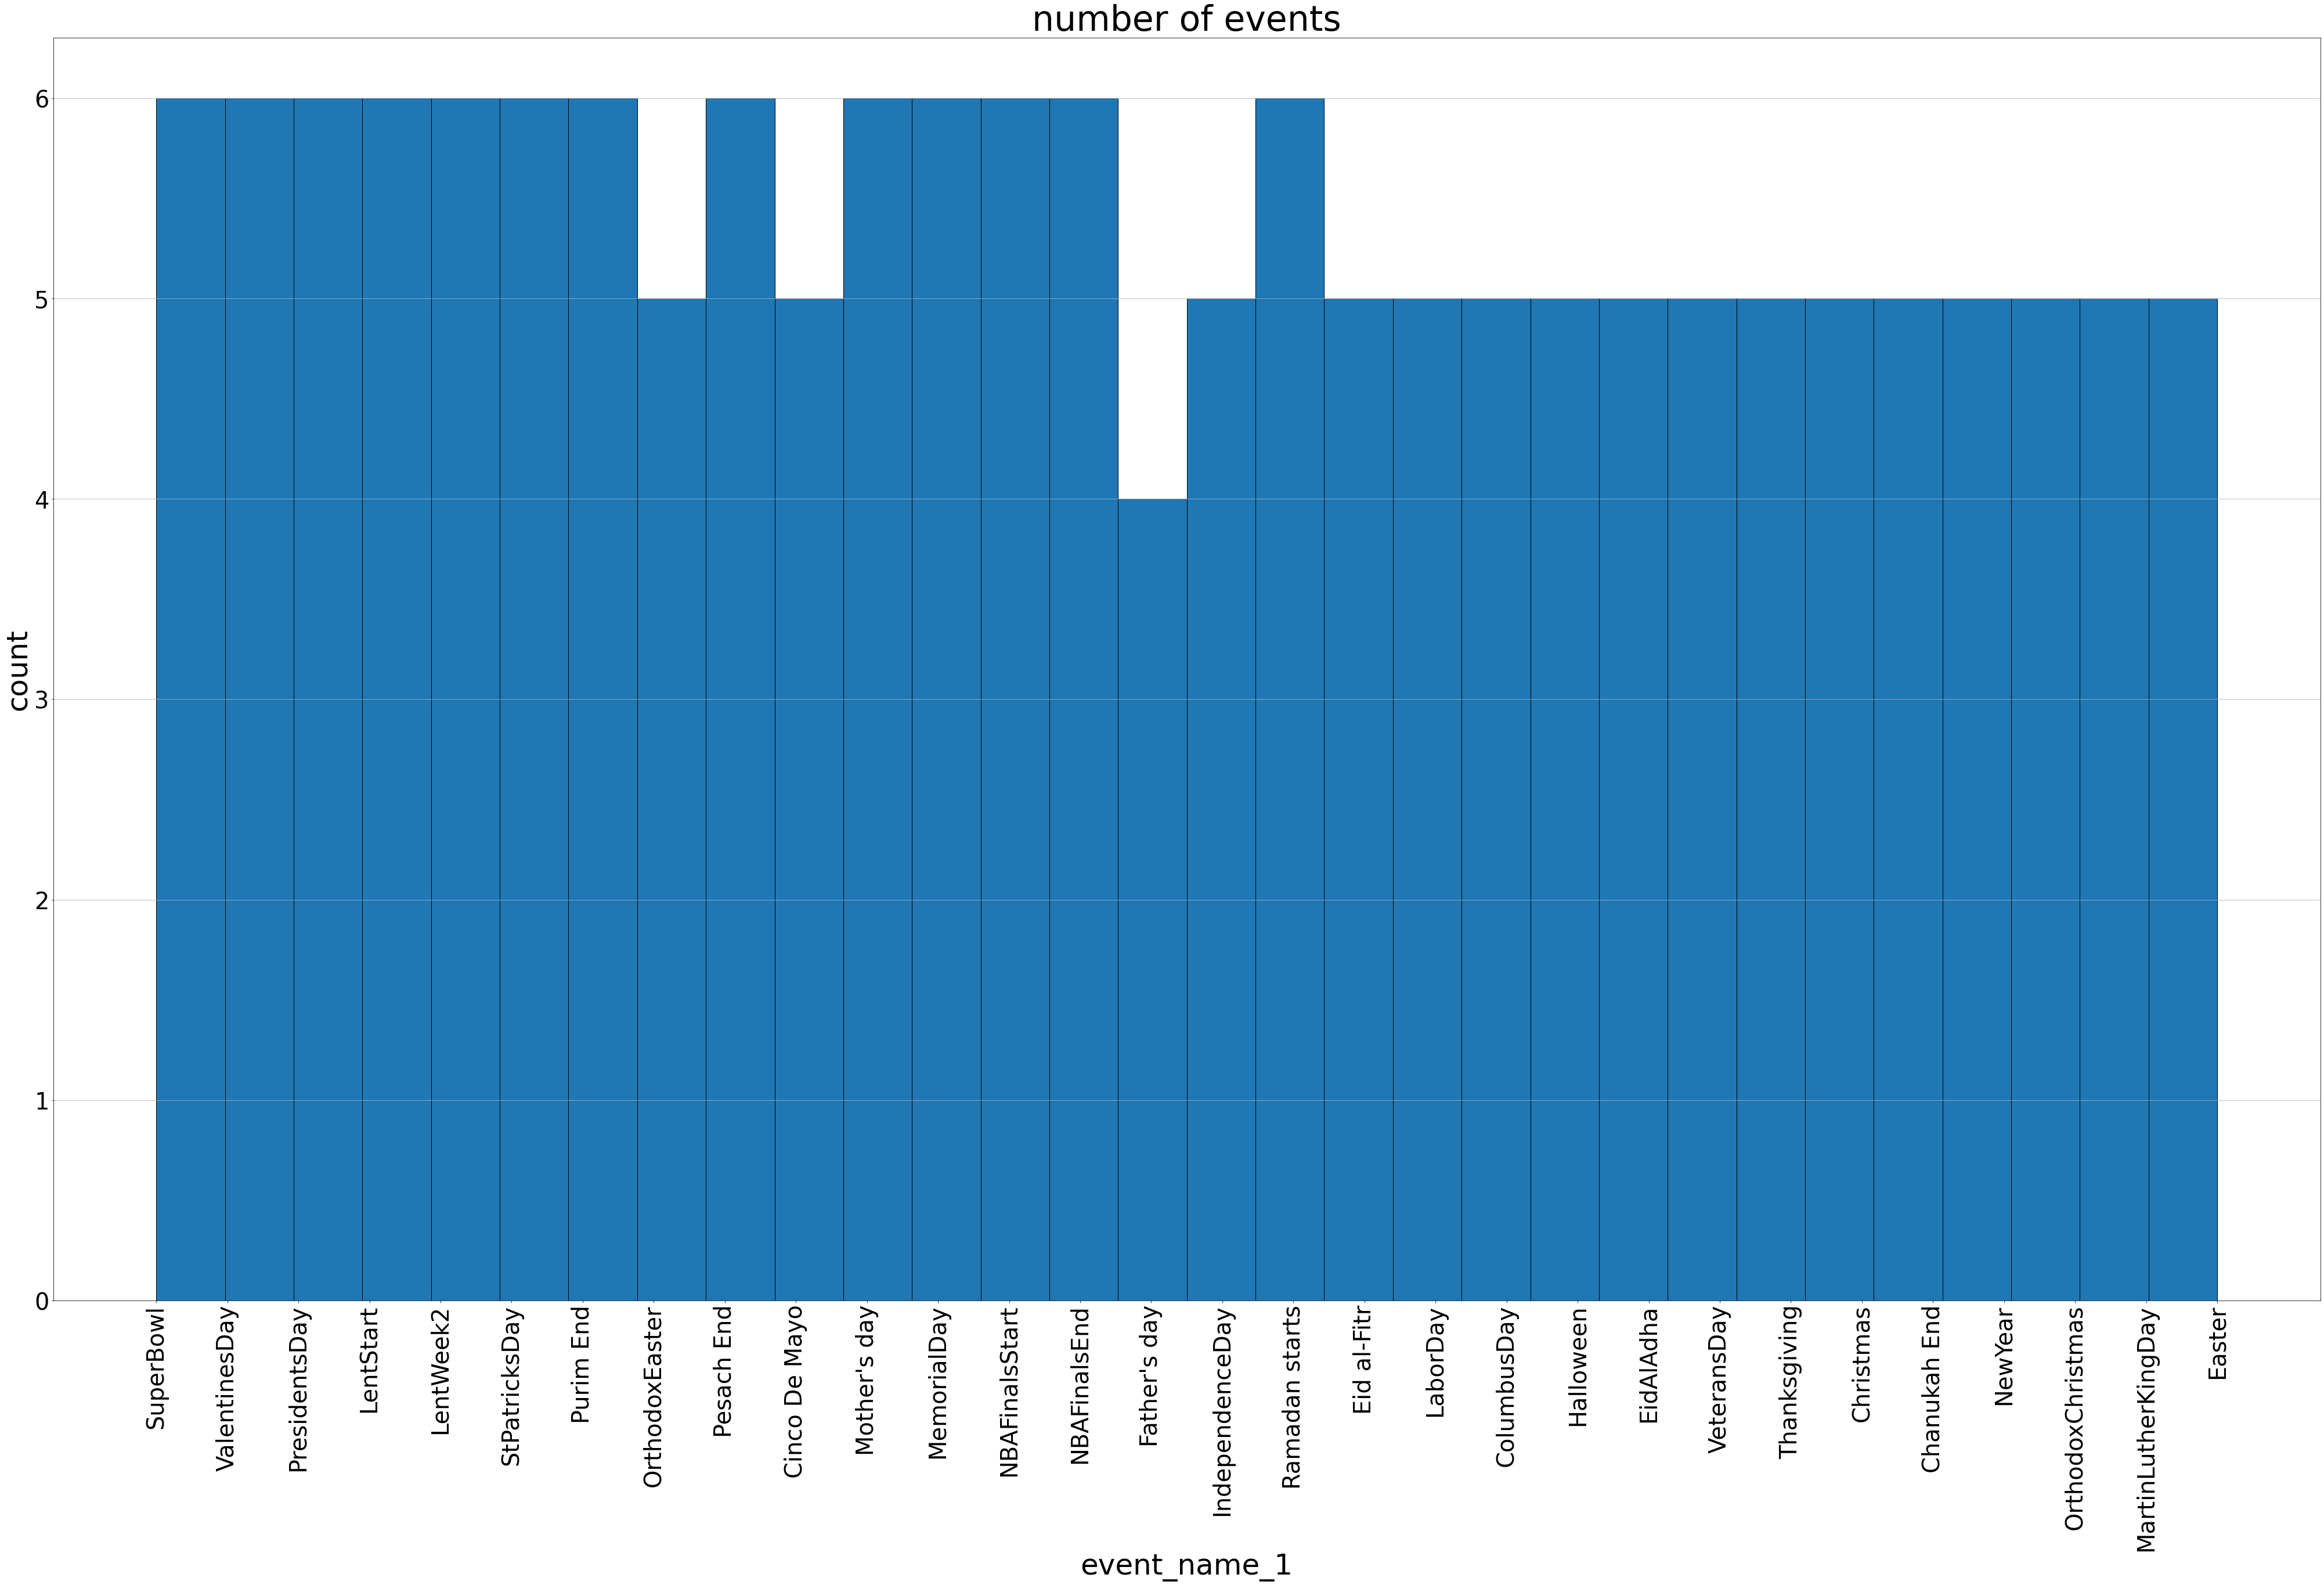

In [ ]:
#len(set(calendar['event_name_1'].dropna().values))=total number of unique values in event_name_1 column...
plt.figure(figsize=(70,40))
plt.hist(x=calendar['event_name_1'].dropna().values,bins=len(set(calendar['event_name_1'].dropna().values)),ec='black')
plt.xlabel("event_name_1",fontsize=50)
plt.ylabel("count",fontsize=50)
plt.title('number of events',fontsize=60)
plt.legend
plt.grid(axis='y')
plt.xticks(fontsize=40,rotation='vertical')
plt.yticks(fontsize=40)
plt.show()

##**CONCLUSIONS DRAWN FROM HISTOGRAM OF EVENT_NAME_1-**
    1.THERE ARE 30 EVENTS IN EVENTS_NAME_1 COLUMN
    2.THERE ARE 162 DAYS OUT OF 1941 DAYS HAVING SOME EVENT 1
    3.OUT OF ALL EVENTS 13 OCCURS EVERY YEAR(6 TIMES)
    4.16 EVENTS OCCURS 5 TIMES IN 6 YEARS UNDER EVENT_NAME_1

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    4.DOES THE EVENTS WHICH OCCURS LESS THAN 6 TIMES(ONCE A YEAR) OCCURS UNDER EVENT_NAME_2?SO THAT ALL EVENTS COLLECTIVELY OCCURS ONCE EVERY YEAR!

###PLOTTING HISTOGRTAM FOR EVENT_TYPE_1

In [ ]:
calendar['event_type_1'].dropna().value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

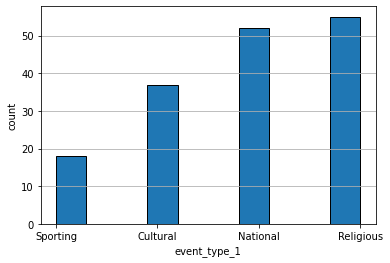

In [ ]:
plt.hist(x=calendar['event_type_1'].dropna().values,ec='black')
plt.xlabel("event_type_1")
plt.ylabel("count")
plt.legend
plt.grid(axis='y')
plt.show()

##**CONCLUSIONS DRAWN FROM HISTOGRAM OF EVENT_TYPE_1-**
    1.THERE ARE 4 EVENTS TYPE UNDER EVENT_TYPE_1
    2.RELIGIOUS EVENTS OCCURS MORE FOLLOWED BY NATIONAL,CUTURAL AND SPORTING

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    4.DOES THE EVENTS WHICH OCCURS LESS THAN 6 TIMES(ONCE A YEAR) OCCURS UNDER EVENT_NAME_2?SO THAT ALL EVENTS COLLECTIVELY OCCURS ONCE EVERY YEAR!

###PLOTTING HISTOGRAM FOR EVENTS UNDER EVENT_NAME_2

In [ ]:
calendar['event_name_2'].dropna().value_counts()

Father's day      2
OrthodoxEaster    1
Easter            1
Cinco De Mayo     1
Name: event_name_2, dtype: int64

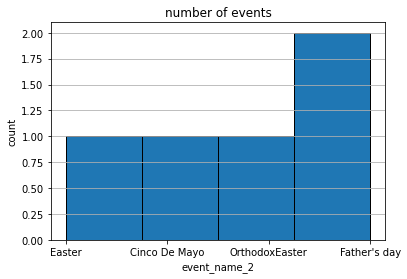

In [ ]:
#len(set(calendar['event_name_2'].dropna().values))=total number of unique values in event_name_2 column...

plt.hist(x=calendar['event_name_2'].dropna().values,bins=len(set(calendar['event_name_2'].dropna().values)),ec='black')
plt.xlabel("event_name_2")
plt.ylabel("count")
plt.title('number of events')
plt.legend
plt.grid(axis='y')
plt.show()

##**CONCLUSIONS DRAWN FROM HISTPGRAM OF EVENT_NAME_2-**
    1.FATHER'S DAY OCCURS 2 TIMES UNDER EVENT_NAME_2 AND IT ALSO OCCURS 4 TIMES IN EVENT_NAME_1..SO THIS EVENT CAN BE ASSUMED TO FALL EVERY YEAR..
    2.EASTER,CINCO DE MAYO,ORTHODOX EASTER OCCURS 1 TIME UNDER EVENT_NAME_2 AND 5 TIMES UNDER EVENT_NAME_1..SO IT CAN BE ASSUMED TO OCCUR ANNUALLY


INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    4.DOES THE FATHER'S DAY AND THE REMAINING EVENTS UNDER EVENT_NAME_2 IS UNDER SAME DATE OR OTHER?(IF ITS ON SAME DAY WE CAN NOT CONCLUDE THAT EVENT OCCURS ANNUALY)

###PLOTTING HISTOGRAM FOR EVENT_TYPE_2

In [ ]:
calendar['event_type_2'].dropna().value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

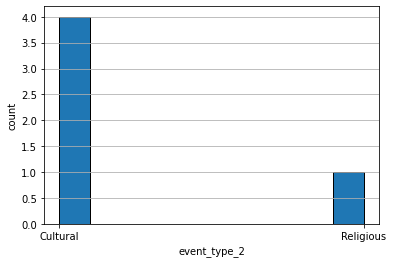

In [ ]:
plt.hist(x=calendar['event_type_2'].dropna().values,ec='black')
plt.xlabel("event_type_2")
plt.ylabel("count")
plt.legend
plt.grid(axis='y')
plt.show()

##**CONCLUSIONS DRAWN FROM HISTOGARM OF EVENTS_TYPE_2-**
    1.CULTURAK EVENTS OCCURS MORE THAN RELIGIOUS EVENTS

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    4.DOES THE FATHER'S DAY AND THE REMAINING EVENTS UNDER EVENT_NAME_2 IS UNDER SAME DATE OR OTHER?(IF ITS ON SAME DAY WE CAN NOT CONCLUDE THAT EVENT OCCURS ANNUALY)

###LET'S CHECK WHETHER COMMON EVENTS UNDER EVENT_NAME_1 AND EVENT_NAME_2 OCCURS ON DIIFERENT DAY OR NOT!


In [ ]:
print(calendar[(calendar['event_name_1']=='Cinco De Mayo') | (calendar['event_name_2']=='Cinco De Mayo')][['date','event_name_1','event_name_2']])
print("-"*100)

print(calendar[(calendar['event_name_1']=='OrthodoxEaster') | (calendar['event_name_2']=='OrthodoxEaster')][['date','event_name_1','event_name_2']])
print("-"*100)

print(calendar[(calendar['event_name_1']=='Easter') | (calendar['event_name_2']=='Easter')][['date','event_name_1','event_name_2']])
print("-"*100)

print(calendar[(calendar['event_name_1']=="Father's day") | (calendar['event_name_2']=="Father's day")][['date','event_name_1','event_name_2']])
print("-"*100)

           date    event_name_1   event_name_2
96   2011-05-05   Cinco De Mayo            NaN
462  2012-05-05   Cinco De Mayo            NaN
827  2013-05-05  OrthodoxEaster  Cinco De Mayo
1192 2014-05-05   Cinco De Mayo            NaN
1557 2015-05-05   Cinco De Mayo            NaN
1923 2016-05-05   Cinco De Mayo            NaN
----------------------------------------------------------------------------------------------------
           date    event_name_1    event_name_2
85   2011-04-24  OrthodoxEaster          Easter
442  2012-04-15  OrthodoxEaster             NaN
827  2013-05-05  OrthodoxEaster   Cinco De Mayo
1177 2014-04-20          Easter  OrthodoxEaster
1534 2015-04-12  OrthodoxEaster             NaN
1919 2016-05-01  OrthodoxEaster             NaN
----------------------------------------------------------------------------------------------------
           date    event_name_1    event_name_2
85   2011-04-24  OrthodoxEaster          Easter
435  2012-04-08          Easter      

##**CONCLUSIONS**-
    THE 4 EVENTS NAMELY FATHER'S DAY,ORTHODOXEASTER,EASTER,CINCO DE MAYO OCCURS ON DIIFERENT DAY(THAT TO DIFFERENT YEAR) UNDER EVENT_NAME_1 AND EVENT_NAME_2..

    SO THESE EVENTS OCCURS ANNUALY


INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###LET'S ANALYZE WHETHER THE EVENT DAYS AFFECT SALES OR NOT


###PIE CHART FOR TOTAL SALES ON EVENT DAYS AND NON EVENT DAYS

In [ ]:
sales_event=sales_pivot[(sales_pivot['event_type_1'].notnull()) | (sales_pivot['event_type_2'].notnull()) ][['sale']].mean()
sales_event


sale    1.083303
dtype: float64

In [ ]:
sales_non_event=sales_pivot[(sales_pivot['event_type_1'].isnull()) | (sales_pivot['event_type_1'].isnull())][['sale']].mean()
sales_non_event

sale    1.135105
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


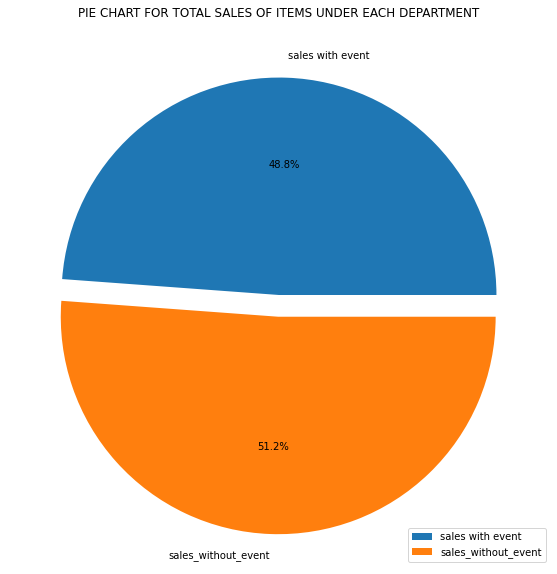

In [ ]:
plt.figure(figsize=(10,10))
plt.title("PIE CHART FOR TOTAL SALES OF ITEMS UNDER EACH DEPARTMENT")
plt.pie(x=[sales_event,sales_non_event],explode=(0,0.1),labels=['sales with event','sales_without_event'],autopct='%1.1f%%')
plt.legend(loc=4)
plt.show()
plt.close()

##**CONCLUSIONS**-
    1.OVERALL THE EVENT DAYS DOES NOT AFFECT THE SALE MUCH .

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    4.WHY SALES ARE NOT HIGH ON EVENT DAYS?

###PLOTTING SALES DATA ON EVENT DAYS


In [ ]:
type_1_event=calendar['event_type_1'].dropna().unique()
print(type_1_event)

type_2_event=calendar['event_type_2'].dropna().unique()
print(type_2_event)

['Sporting', 'Cultural', 'National', 'Religious']
Categories (4, object): ['Sporting', 'Cultural', 'National', 'Religious']
['Cultural', 'Religious']
Categories (2, object): ['Cultural', 'Religious']


In [ ]:
sales_event=sales_pivot[(sales_pivot['event_type_1'].notnull()) | (sales_pivot['event_type_2'].notnull()) ][['event_type_1','event_type_2','sale']]
sales_event1=sales_event.groupby(['event_type_1']).sum().reset_index()
print(sales_event1)

sales_event2=sales_event.groupby(['event_type_2']).sum().reset_index()
sales_event2


  event_type_1       sale
0     Cultural  1284588.0
1     National  1502384.0
2    Religious  1859017.0
3     Sporting   572737.0


,event_type_2,sale
0,Cultural,109715.0
1,Religious,38934.0


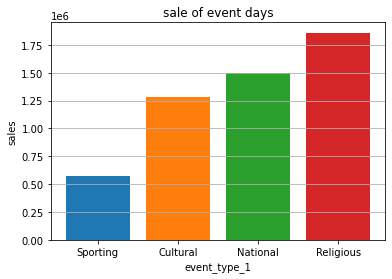

In [ ]:
plt.bar(x=type_1_event[0],height=sales_event1['sale'].values[3])
plt.bar(x=type_1_event[1],height=sales_event1['sale'].values[0])
plt.bar(x=type_1_event[2],height=sales_event1['sale'].values[1])
plt.bar(x=type_1_event[3],height=sales_event1['sale'].values[2])
plt.xlabel("event_type_1")
plt.ylabel("sales")
plt.title('sale of event days')
plt.legend
plt.grid(axis='y')
plt.show()

##**CONCLUSIONS**-
    1.SALES ARE HIGHER ON EVENT DAYS WITH TYPE RELIGIOUS.PEOPLE TEND TO SHOP MORE ON RELIGIOUS HOLIDAYS FOLLOWED BY NATIONAL,CULTURAL AND SPORTING..
    2.SPORTING EVENT TENDS TO HAVE LOW SALES AS PEOPLE REMAIN BUSY IS ENJOYING SPORTS.SALES ARE LOWER THAN MEAN SALE(1.13) ON ALL THE NON EVENT DAYS..THUS..LOWERS THE MEAN SALES DATA FOR EVENT DAYS

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

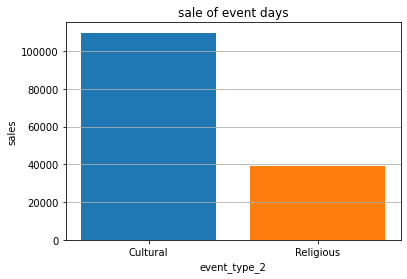

In [ ]:
plt.bar(x=type_2_event[0],height=sales_event2['sale'].values[0])
plt.bar(x=type_2_event[1],height=sales_event2['sale'].values[1])
plt.xlabel("event_type_2")
plt.ylabel("sales")
plt.title('sale of event days')
plt.legend
plt.grid(axis='y')
plt.show()

In [ ]:
calendar['event_type_2'].dropna().value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

##**CONCLUSIONS-**
    1.SALES ARE HIGHER ON EVENT DAYS WITH TYPE CULTIRAL FOLLOWED BY RELIGIOUS.SINCE THERE ARE MORE EVENTS UNDER EVENT NAME 2 BELONGING TO TYPE CULTURAL AND HENCE THE SALES DATA ARE MORE THAN RELIGIOUS
    

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?

###ANALYZING SNAP COLUMN IN CALENDAR DATA

In [ ]:
calendar[calendar['snap_CA']==1]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,2016-06-06,11619,Monday,3,6,2016,d_1956,NaN,NaN,NaN,NaN,1,1,1
1956,2016-06-07,11619,Tuesday,4,6,2016,d_1957,Ramadan starts,Religious,NaN,NaN,1,1,0
1957,2016-06-08,11619,Wednesday,5,6,2016,d_1958,NaN,NaN,NaN,NaN,1,0,1
1958,2016-06-09,11619,Thursday,6,6,2016,d_1959,NaN,NaN,NaN,NaN,1,1,1


In [ ]:
calendar[calendar['snap_TX']==1]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,2016-06-09,11619,Thursday,6,6,2016,d_1959,NaN,NaN,NaN,NaN,1,1,1
1960,2016-06-11,11620,Saturday,1,6,2016,d_1961,NaN,NaN,NaN,NaN,0,1,1
1961,2016-06-12,11620,Sunday,2,6,2016,d_1962,NaN,NaN,NaN,NaN,0,1,1
1962,2016-06-13,11620,Monday,3,6,2016,d_1963,NaN,NaN,NaN,NaN,0,1,0


In [ ]:
calendar[calendar['snap_WI']==1]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
10,2011-02-08,11102,Tuesday,4,2,2011,d_11,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,2016-06-09,11619,Thursday,6,6,2016,d_1959,NaN,NaN,NaN,NaN,1,1,1
1960,2016-06-11,11620,Saturday,1,6,2016,d_1961,NaN,NaN,NaN,NaN,0,1,1
1961,2016-06-12,11620,Sunday,2,6,2016,d_1962,NaN,NaN,NaN,NaN,0,1,1
1963,2016-06-14,11620,Tuesday,4,6,2016,d_1964,NaN,NaN,NaN,NaN,0,0,1


##**CONCLUSIONS DRAWN FROM SNAP COLUMNS OF CALENDAR DATASET-**
    1.OUT OF 1941 DAYS 650 DAYS HAVE SNAP=1 WHICH IMPLIES THERE ARE 650 DAYS WHERE PROMOTIONS ARE APPLIED FOR STORES IN EACH STATE..THIS PROMOTION INCREASE SALE ON SUCH DAYS


INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    4.DOES THESE PROMOTION ACTUALLY INCREASES THE SALE OR NOT?

###LET'S ANALYZE WHETHER SNAP==1 ACTUALLY INFLUENCES THE SALES ON NOT?

###FOR STORES IN CALIFORNIA

In [ ]:
#MEAN SALE FROM STORES IN CALIFORNIA
mean_ca=state_ca['sale'].mean()
print(mean_ca)

15042.100463678516


In [ ]:
#MEAN OF SALES ON DAYS HAVING SNAP==1 FOR CALIFORNIA
snap_ca_data=sales_pivot[sales_pivot['snap_CA']==1][['date','sale']]
snap_ca_data

mean_snap_ca=snap_ca_data.groupby(['date']).sum().reset_index()
print(mean_snap_ca['sale'].mean())

36379.090625


###BOX PLOT OF SALES DATA UNDER CALIFORNIA

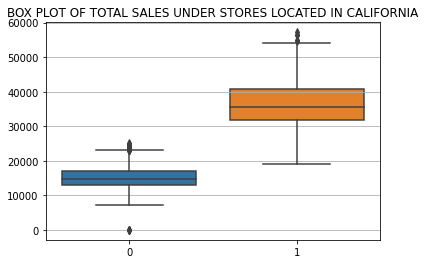

In [ ]:
plt.figure()
plt.grid()
plt.title("BOX PLOT OF TOTAL SALES UNDER STORES LOCATED IN CALIFORNIA")


sns.boxplot(data=[state_ca['sale'],mean_snap_ca['sale']])


plt.show()
plt.close()

##**CONCLUSIONS FROM BOX PLOT OF MEAN SALES DATA FROM CALIFORNIA STORES EVERY DAY AND DAY WHEN SNAP==1-**
    1.THE MEAN SALE OF CALIFORNIA STORES ACROSS ALL 1941 DAYS IS LESSER THAN MEAN SALE OF DAYS WHEN SANP==1 I.E., PROMOTIONS ARE GIVEN TO CUSTOMERS..
    IT IS QUITE EVIDENT FROM THE BOX PLOT(THE MEAN LIES ABOVE MEAN OF TOTAL SALES PER DAY IN CA STORES)..

    SNAP==1 DOES INDEED EFFECTS SALES(SALES INCREASES ON THIS DAY)

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    4.DOES SNAP==1 ALSO INCREASES SALES FOR STORES IN TX AND WI?
    

###FOR STORES IN TEXAS


In [ ]:
#MEAN SALES OF EVERYDAY TOTAL SALE IN TX STORES
mean_tx=state_tx['sale'].mean()
print(mean_tx)

9906.442555383823


In [ ]:
#MEAN OF SALES ON DAYS HAVING SNAP==1 FOR CALIFORNIA
snap_tx_data=sales_pivot[sales_pivot['snap_TX']==1][['date','sale']]
snap_tx_data

mean_snap_tx=snap_tx_data.groupby(['date']).sum().reset_index()
print(mean_snap_tx['sale'].mean())

36700.409375


###PLOTTING BOX PLOT OF TOTAL SALES IN TEXAS STORES FOR EACH DAY AND DAYS WHEN SNAP==1

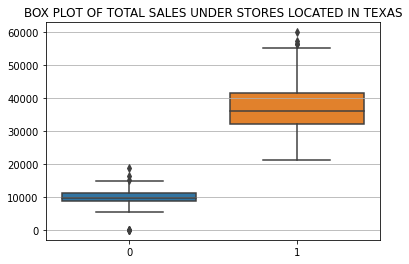

In [ ]:
plt.figure()
plt.grid()
plt.title("BOX PLOT OF TOTAL SALES UNDER STORES LOCATED IN TEXAS")


sns.boxplot(data=[state_tx['sale'],mean_snap_tx['sale']])


plt.show()
plt.close()

##**CONCLUSIONS FROM THE BOX PLOT BETWEEN TOTAL SALES EACH DAY IN TEXAS AND DAYS WHEN SNAP==1-**
    THE MEAN SALES IS HIGHER ON DAYS WHEN THERE ARE SNAP==1 AND THUS SNAP==1 AFFECTS TOTAL SALE VOLUME(SALES INCREASES ON DAYS WHEN SNAP=1)

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    4.DOES SNAP==1 ALSO INCREASES SALES FOR STORES IN  WI?

###FOR STORES IN WISCONSIN

In [ ]:
#MEAN SALES OF EVERYDAY TOTAL SALE IN TX STORES
mean_wi=state_wi['sale'].mean()
print(mean_wi)

9532.226172076249


In [ ]:
#MEAN OF SALES ON DAYS HAVING SNAP==1 FOR CALIFORNIA
snap_wi_data=sales_pivot[sales_pivot['snap_WI']==1][['date','sale']]
snap_wi_data

mean_snap_wi=snap_wi_data.groupby(['date']).sum().reset_index()
print(mean_snap_wi['sale'].mean())

36734.1859375


###PLOTTING BOX PLOT OF TOTAL SALES IN WISCONSIN STORES FOR EACH DAY AND DAYS WHEN SNAP==1

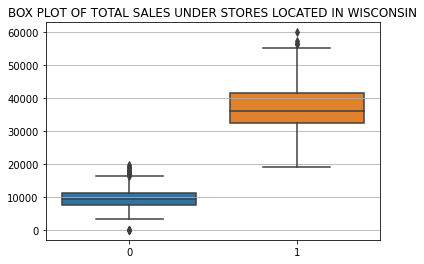

In [ ]:
plt.figure()
plt.grid()
plt.title("BOX PLOT OF TOTAL SALES UNDER STORES LOCATED IN WISCONSIN")


sns.boxplot(data=[state_wi['sale'],mean_snap_wi['sale']])


plt.show()
plt.close()

##**CONCLUSIONS FROM THE BOX PLOT BETWEEN TOTAL SALES EACH DAY IN WISCONSIN AND DAYS WHEN SNAP==1-**
    THE MEAN SALES IS HIGHER ON DAYS WHEN THERE ARE SNAP==1 AND THUS SNAP==1 AFFECTS TOTAL SALE VOLUME(SALES INCREASES ON DAYS WHEN SNAP=1)

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?
    3.WHAT IS THAT DAY PRECISELY WHEN THE SALES ARE ZERO?
    

###PLOTTING CALENDAR HEATMAP

In [ ]:
#import calmap
date_sales=sales_pivot[['date','sale']]
date_sales



In [ ]:
date_sales=date_sales.groupby(['date']).sum()
date_sales

In [ ]:
! pip3 install calmap

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 2880x1440 with 0 Axes>

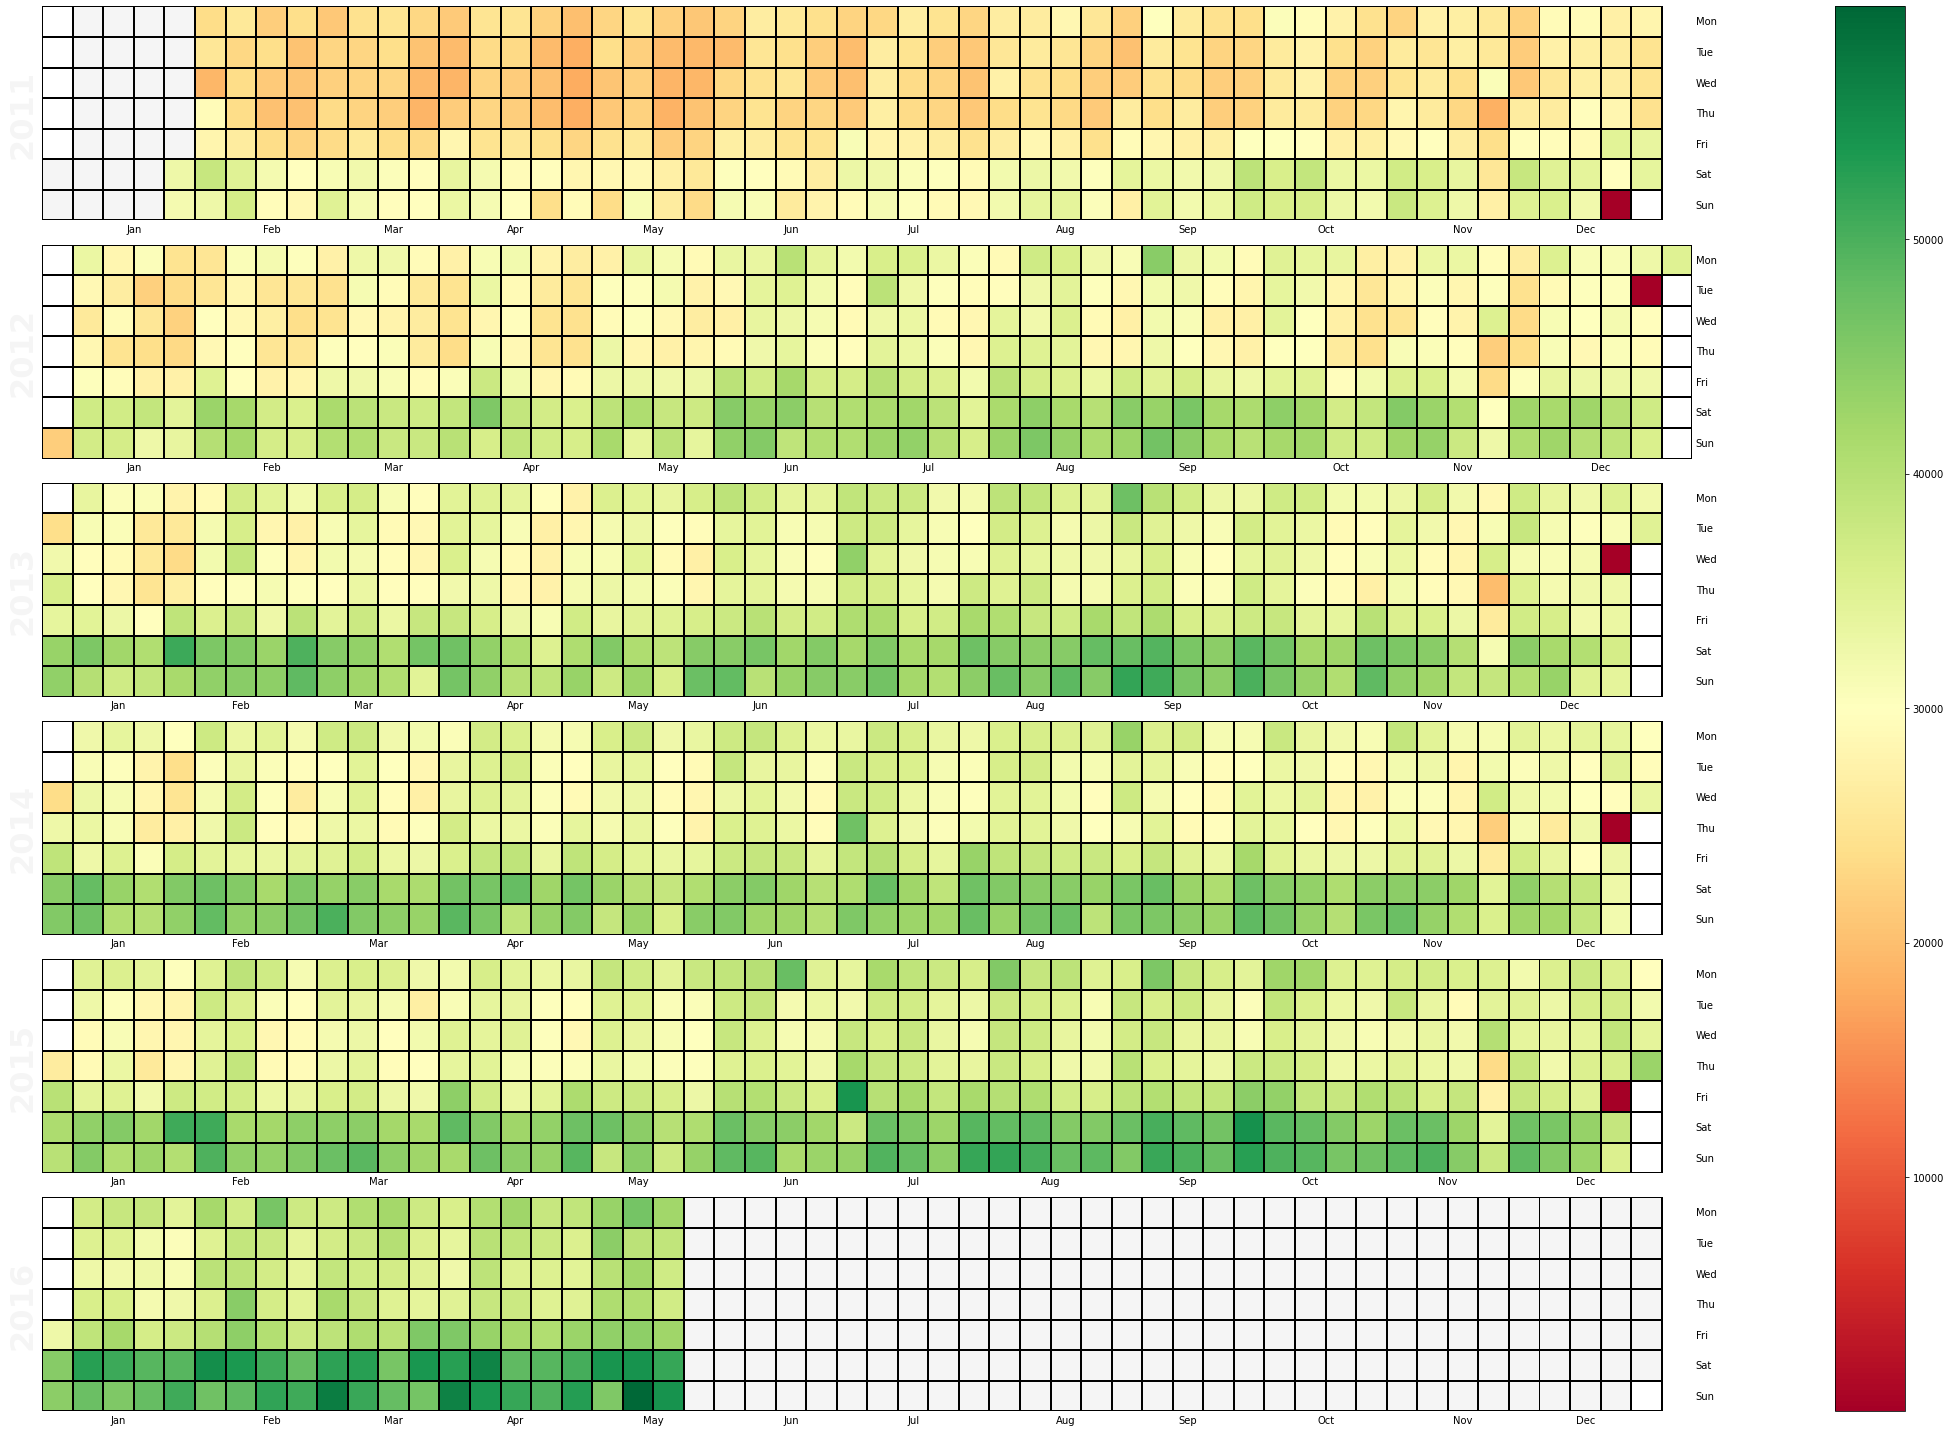

In [ ]:
#REFERENCE-https://pythonhosted.org/calmap/
#REFERENCE-https://stackoverflow.com/questions/35871379/add-a-colorbar-to-a-calmap-plot
import calmap
plt.figure(figsize=(40,20))

fig,ax=calmap.calendarplot(date_sales['sale'],yearlabels=True,fig_kws={'figsize': (40,20)},cmap='RdYlGn',edgecolor='black')
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())


In [ ]:
calendar[calendar['date']=='2011-12-25']




,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
330,2011-12-25,11148,Sunday,2,12,2011,d_331,Christmas,National,NaN,NaN,0,0,0


In [ ]:
calendar[calendar['date']=='2012-12-25']



,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
696,2012-12-25,11248,Tuesday,4,12,2012,d_697,Christmas,National,NaN,NaN,0,0,0


In [ ]:
calendar[calendar['date']=='2013-12-25']



,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1061,2013-12-25,11348,Wednesday,5,12,2013,d_1062,Christmas,National,NaN,NaN,0,0,0


In [ ]:
calendar[calendar['date']=='2014-12-25']



,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1426,2014-12-25,11447,Thursday,6,12,2014,d_1427,Christmas,National,NaN,NaN,0,0,0


In [ ]:
calendar[calendar['date']=='2015-12-25']

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1791,2015-12-25,11547,Friday,7,12,2015,d_1792,Christmas,National,NaN,NaN,0,0,0


##**CONCLUSIONS FROM THE CALENDAR HEATMAP-**
    1.THE 25TH DECEMBER OF EACH YEAR HAS ZERO TOTAL SALES ACROSS ALL THE STORES IN USA..THE 25TH DECEMBER IS CHRISTMAS DAY AND STORES REMAIN CLOSED DUE TO THE CHRISTMAS AND HENCE ZERO SALES ARE RECORDED ON THAT DAY EVERY YEAR..
    2.THE ZERO SALE IN PREVIOUS TIME SERIES PLOTTED WAS ON 25TH DECEMBER AND WAS DUE TO CHRISTMAS HOLIDAY..


INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?

###PERFORMING EDA ON PRICE DATAFRAME

In [ ]:
price.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype   
---  ------      -----   
 0   store_id    category
 1   item_id     category
 2   wm_yr_wk    int16   
 3   sell_price  float32 
dtypes: category(2), float32(1), int16(1)
memory usage: 58.8 MB


In [ ]:
price['sell_price'].mean()

4.286811828613281

In [ ]:
price['sell_price'].median()

3.4700000286102295

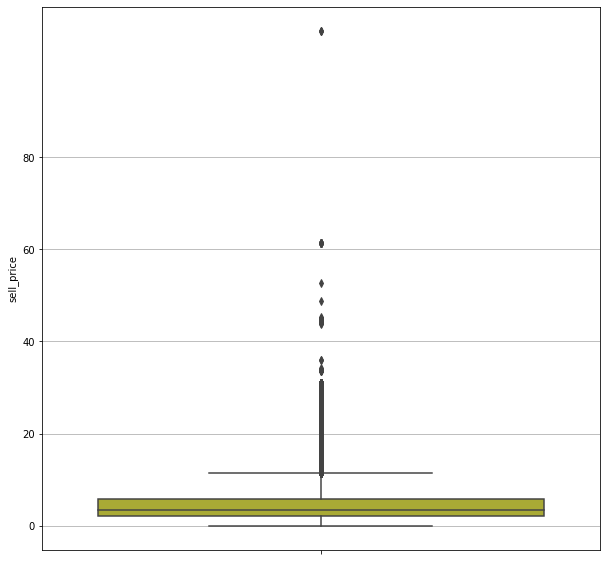

In [ ]:
plt.figure(figsize=(10,10))
plt.grid()
sns.boxplot(y=price['sell_price'],color='tab:olive')
plt.yticks(np.arange(0,100,20))
plt.show()

##**CONCLUSIONS FROM THE BOX PLOT OF SELLING PRICE OF ITEMS UNDER ALL THE STORES IN USA-**
    1.FROM BOX PLOT OF SELL_PRICE COLUMN IT IS EVIDENT THAT THERE ARE SOME ITEMS WHOSE VALUES ARE HIGH..WHICH IMPLIES THERE ARE SOME ITEMS WHOSE SELLING PRICE ARE HIGH..THE MEAN AND MEDIAN SELLING PRICE ARE 4.41 AND 3.47
    2.THERE ARE CERTAIN ITEMS WHICH HAVE HIGH SELLING PRICE

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?

LETS DEEP DIVE INTO THESE HIGH VALUES

In [ ]:
price[price['sell_price']>12]

,store_id,item_id,wm_yr_wk,sell_price
4662,CA_1,HOBBIES_1_020,11248,12.68
4663,CA_1,HOBBIES_1_020,11249,12.68
4664,CA_1,HOBBIES_1_020,11250,12.68
4665,CA_1,HOBBIES_1_020,11251,12.68
4666,CA_1,HOBBIES_1_020,11252,12.68
...,...,...,...,...
6722430,WI_3,FOODS_3_298,11617,18.73
6722431,WI_3,FOODS_3_298,11618,18.73
6722432,WI_3,FOODS_3_298,11619,18.73
6722433,WI_3,FOODS_3_298,11620,18.73


In [ ]:
price['sell_price'].max()

107.31999969482422

THE MAXIMUM SELLING PRICE IS 107.32

###MERGING PRICE DATAFRAME WITH SALES_PIVOT DATFRAME


In [ ]:
#from tqdm import tqdm
final_df=sales_pivot.merge(price,on=['store_id', 'item_id', 'wm_yr_wk'],how='left')
final_df.head()




,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,NaN


###NOTE:FOR SELL PRICE COLUMN AFTER MERGING ALL THE REQUIRED DATAFRAME,THERE ARE MANY NAN VALUES WHICH SHOULD BE DEALT WITH DURING PREPROCESSING STEP...THESE NAN VALUE ARE DUE TO THE FACT THAT THE SELL_PRICE IN PRICE DATAFRAME IS THE AVERAGE SELLING PRICE OF THE ITEM THAT WEEK....IF NAN VALUES ARE THERE IT IMPLIES ITEMS ARE NOT SOLD IN THAT WEEK

In [ ]:
#saving the final dataframe to pickle file
#final_df.to_pickle("final_df.pkl")

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59181090 entries, 0 to 59181089
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            category      
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             category      
 7   sale          int16         
 8   date          datetime64[ns]
 9   wm_yr_wk      int16         
 10  weekday       category      
 11  wday          int8          
 12  month         int8          
 13  year          int16         
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       int8          
 19  snap_TX       int8          
 20  snap_WI       int8          
 21  sell_price    float32       
dtypes: category(12), datetime64[ns](1), float32(1), int16(3), int8(5

###PLOTTING BOX PLOT FOR SELLING PRICE PER STATE

In [ ]:
sp_ca=sales_pivot[sales_pivot['state_id']=='CA'][['sell_price']]
sp_ca

In [ ]:
sp_tx=sales_pivot[sales_pivot['state_id']=='TX'][['sell_price']]


print(sp_tx)


sp_wi=sales_pivot[sales_pivot['state_id']=='WI'][['sell_price']]


print(sp_wi)

In [ ]:
print("mean of CA stores:",sp_ca.mean())
print("mean of TX stores:",sp_tx.mean())
print("mean of WI stores:",sp_wi.mean())


print("median of CA stores:",sp_ca.median())
print("median of TX stores:",sp_tx.median())
print("median of WI stores:",sp_wi.median())


mean of CA stores: sell_price    4.109684
dtype: float32
mean of TX stores: sell_price    4.202347
dtype: float32
mean of WI stores: sell_price    4.264234
dtype: float32
median of CA stores: sell_price    3.47
dtype: float32
median of TX stores: sell_price    3.42
dtype: float32
median of WI stores: sell_price    3.47
dtype: float32


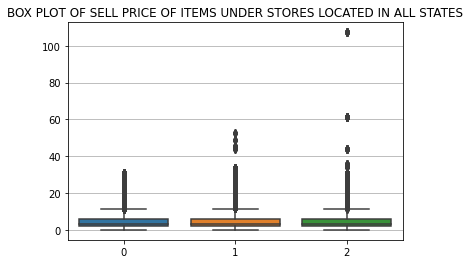

In [ ]:
plt.figure()
plt.grid()
plt.title("BOX PLOT OF SELL PRICE OF ITEMS UNDER STORES LOCATED IN ALL STATES")

sns.boxplot(data=[sp_ca,sp_tx,sp_wi])


plt.show()
plt.close()


###LET'S DIVE INTO THIS ITEM WITH HIGH SELLING PRICE IN WISCONSIN STORE

In [ ]:
sales_pivot[sales_pivot['sell_price']>=100]

,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
15637503,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_841,0,2013-05-18,11317,Saturday,1,5,2013,NaN,NaN,NaN,NaN,0,0,0,107.32
15637504,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_842,0,2013-05-19,11317,Sunday,2,5,2013,NaN,NaN,NaN,NaN,0,0,0,107.32
15637505,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_843,0,2013-05-20,11317,Monday,3,5,2013,NaN,NaN,NaN,NaN,0,0,0,107.32
15637506,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_844,0,2013-05-21,11317,Tuesday,4,5,2013,NaN,NaN,NaN,NaN,0,0,0,107.32
15637507,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_845,0,2013-05-22,11317,Wednesday,5,5,2013,NaN,NaN,NaN,NaN,0,0,0,107.32
15637508,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_846,0,2013-05-23,11317,Thursday,6,5,2013,NaN,NaN,NaN,NaN,0,0,0,107.32
15637509,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_847,1,2013-05-24,11317,Friday,7,5,2013,NaN,NaN,NaN,NaN,0,0,0,107.32
15806322,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_848,0,2013-05-25,11318,Saturday,1,5,2013,NaN,NaN,NaN,NaN,0,0,0,107.32
15806323,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_849,0,2013-05-26,11318,Sunday,2,5,2013,NaN,NaN,NaN,NaN,0,0,0,107.32
15806324,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_850,0,2013-05-27,11318,Monday,3,5,2013,MemorialDay,National,NaN,NaN,0,0,0,107.32


###CHECKING IF THE SAME ITEM IS PRESENT IN DIFFERENT STORES OR NOT OR IN SME STORE HAVING DIFFERENT SELLING PRICE

In [ ]:
sales_pivot[sales_pivot['item_id']=='HOUSEHOLD_2_406']

,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
3675,HOUSEHOLD_2_406_CA_1_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0,12.47
3676,HOUSEHOLD_2_406_CA_1_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_2,1,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0,12.47
3677,HOUSEHOLD_2_406_CA_1_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_3,0,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0,12.47
3678,HOUSEHOLD_2_406_CA_1_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_4,0,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0,12.47
3679,HOUSEHOLD_2_406_CA_1_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,CA_1,CA,d_5,0,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1,12.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46866386,HOUSEHOLD_2_406_WI_1_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_1,WI,d_1941,1,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,NaN,NaN,0,0,0,12.46
46872483,HOUSEHOLD_2_406_WI_2_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_2,WI,d_1940,2,2016-05-21,11617,Saturday,1,5,2016,NaN,NaN,NaN,NaN,0,0,0,12.46
46872484,HOUSEHOLD_2_406_WI_2_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_2,WI,d_1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,NaN,NaN,0,0,0,12.46
46878581,HOUSEHOLD_2_406_WI_3_evaluation,HOUSEHOLD_2_406,HOUSEHOLD_2,HOUSEHOLD,WI_3,WI,d_1940,0,2016-05-21,11617,Saturday,1,5,2016,NaN,NaN,NaN,NaN,0,0,0,12.46


##**CONCLUSION DRAWN FROM BOX PLOT OF SELLING PRICE OF SELL_PRICE ACROSS STORES OF EACH STATE-**
    1.STORES OF WISCONSIN HAS SOME ITEMS WHOSE SELLING PRICE IS VERY HIGH.THE ITEM IS HOUSEHOLD_2_406.THE SAME ITEM HAS SELL_PRICE 12.46 IN DIFFERENT STORES AND ALSO IN WI_3...SO IT MAY BE AN OUTLIER.
    2.MEAN SELLING PRICE ACROSS ALL STORES IN EACH STATE IS ROUGHLY SAME.

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?

###PLOTTING VIOLIN PLOT FOR STORES IN CA

In [ ]:
sp_ca1=sales_pivot[sales_pivot['store_id']=='CA_1'][['sell_price']]

sp_ca2=sales_pivot[sales_pivot['store_id']=='CA_2'][['sell_price']]

sp_ca3=sales_pivot[sales_pivot['store_id']=='CA_3'][['sell_price']]

sp_ca4=sales_pivot[sales_pivot['store_id']=='CA_4'][['sell_price']]

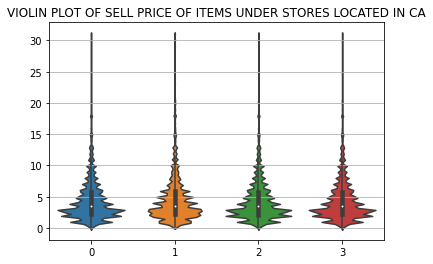

In [ ]:
plt.figure()
plt.grid()
plt.title("VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER STORES LOCATED IN CA")

sns.violinplot(data=[sp_ca1,sp_ca2,sp_ca3,sp_ca4])


plt.show()
plt.close()


##**CONCLUSIONS FROM BOX PLOT OF SELLING PRICE OF STORES IN CA-**
    1.THE SELLING PRICE HAS SAME DISTRIBUTON THROUGHOUT THE STORES IN CALIFORNIA
    2.THE MEAN SELLIN PRICES ARE ALSO ROUGHLY SAME

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?

###PLOTTING VIOLIN PLOT OF SELLING PRICE FOR STORES IN TEXAS

In [ ]:
sp_tx1=sales_pivot[sales_pivot['store_id']=='TX_1'][['sell_price']]

sp_tx2=sales_pivot[sales_pivot['store_id']=='TX_2'][['sell_price']]

sp_tx3=sales_pivot[sales_pivot['store_id']=='TX_3'][['sell_price']]

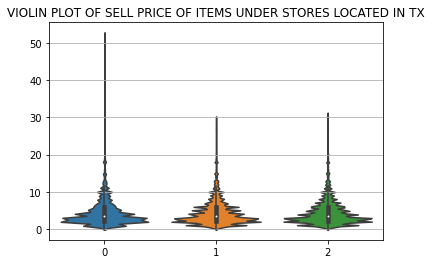

In [ ]:
plt.figure()
plt.grid()
plt.title("VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER STORES LOCATED IN TX")

sns.violinplot(data=[sp_tx1,sp_tx2,sp_tx3])


plt.show()
plt.close()


##**CONCLUSIONS FROM VIOLIN PLOT OF SELLING PRICE OF STORES IN TEXAS-**
    1.THE PRICE DISTRIBUTION IS ROUGHLY SAME ACROSS ALL STORES IN TEXAS WITH SOME HIGH VALUES FOR ITEMS IN STORE TX_1

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?

###PLOTTING VIOLIN PLOT OF SELLING PRICE FOR ITEMS IN STORES OF WI

In [ ]:
sp_wi1=sales_pivot[sales_pivot['store_id']=='WI_1'][['sell_price']]

sp_wi2=sales_pivot[sales_pivot['store_id']=='WI_2'][['sell_price']]

sp_wi3=sales_pivot[sales_pivot['store_id']=='WI_3'][['sell_price']]

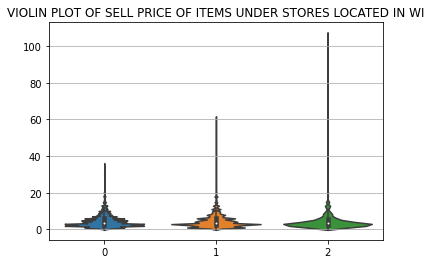

In [ ]:
plt.figure()
plt.grid()
plt.title("VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER STORES LOCATED IN WI")

sns.violinplot(data=[sp_wi1,sp_wi2,sp_wi3])


plt.show()
plt.close()

##**CONCLUSIONS FROM VIOLIN PLOT OF SELLING PRICE OF STORES IN WISCONSIN-**
    1.THE PRICE DISTRIBUTION IS ROUGHLY SAME ACROSS ALL STORES IN WI WITH SOME HIGH VALUES FOR ITEMS IN STORE WI_3..THIS HIGH PRICE MAY BE AN OUTLIER

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD HIGHER THAN HOBBIES?
    2.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?

###PLOTTING VIOLIN PLOTS OF SELLING PRICE UNDER EACH CATEGORY

In [ ]:
sp_food=sales_pivot[sales_pivot['cat_id']=='FOODS'][['sell_price']]

sp_hobbies=sales_pivot[sales_pivot['cat_id']=='HOBBIES'][['sell_price']]

sp_household=sales_pivot[sales_pivot['cat_id']=='HOUSEHOLD'][['sell_price']]

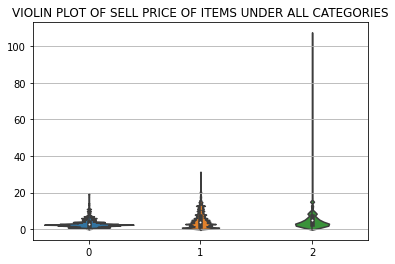

In [ ]:
plt.figure()
plt.grid()
plt.title("VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER ALL CATEGORIES")

sns.violinplot(data=[sp_food,sp_hobbies,sp_household])


plt.show()
plt.close()


##**CONCLUSIONS FROM VIOLIN PLOT OF SELLING PRICES OF ITEMS UNDER EACH CATEGORIES-**
    1.FOODS CATEGORY HAS ITEMS WITH LOW PRICE
    2.HOUSEHOLD ITEMS HAVE HIGH PRICES
    3.UNDER HOUSEHOLD THERE ARE MORE SALES WHEN PRICE ARE LOW THAN IN HOBBIES AND THIS CAN BE ONE OF THE REASONS FOR SALES UNDER HOUSEHOLD > HOBBIES

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER FOODS_3 IS HIGHER THAN FOODS_1 AND FOODS_2;HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?

###PLOTTING VIOLIN PLOT FOR DEPARTMENTS UNDER FOOD CATEGORY

In [ ]:
sp_food1=sales_pivot[sales_pivot['dept_id']=='FOODS_1'][['sell_price']]

sp_food2=sales_pivot[sales_pivot['dept_id']=='FOODS_2'][['sell_price']]

sp_food3=sales_pivot[sales_pivot['dept_id']=='FOODS_3'][['sell_price']]

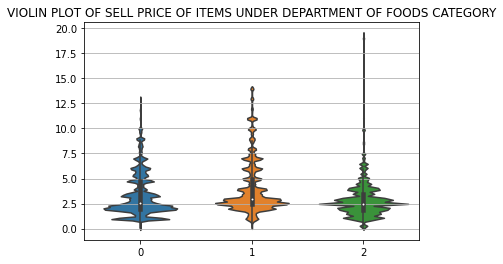

In [ ]:
plt.figure()
plt.grid()
plt.title("VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER DEPARTMENT OF FOODS CATEGORY")

sns.violinplot(data=[sp_food1,sp_food2,sp_food3])


plt.show()
plt.close()

##**CONCLUSIONS FROM THE VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER DEPARTMENT OF FOOD CATEGORY-**
    1.PRICE DISTRIBUTION IS MORE OR LESS WITH SOME PRICES MORE IN FOOD-3 DEPARTMENT
    2.MEAN PRICE OF ITEMS UNDER FOOD_3 IS LESS..AND THUS THE SALES UNDER FOOD_3 ARE HIGHER..SINCE LESS SELLING PRICE TEND TO MAKE SALE HIGH 

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOBBIES 1 MORE THAN HOBBIES 2;HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?

###PLOTTING VIOLIN PLOT FOR DEPARTMENTS UNDER HOBBIES CATEGORY

In [ ]:
sp_hobbies1=sales_pivot[sales_pivot['dept_id']=='HOBBIES_1'][['sell_price']]

sp_hobbies2=sales_pivot[sales_pivot['dept_id']=='HOBBIES_2'][['sell_price']]



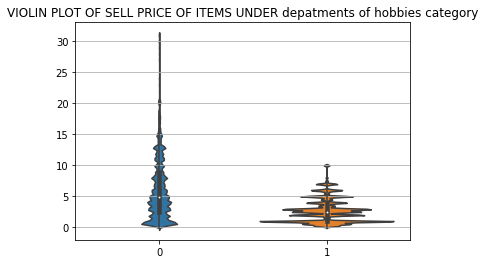

In [ ]:
plt.figure()
plt.grid()
plt.title("VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER depatments of hobbies category")

sns.violinplot(data=[sp_hobbies1,sp_hobbies2])


plt.show()
plt.close()

##**CONCLUSIONS FROM THE VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER DEPARTMENT OF HOBBIES CATEGORY-**
    1.PRICE DISTRIBUTION ARE NOT SAME
    2.MEAN PRICE OF ITEMS UNDER HOBBIES_2 IS LESS..AND THUS THE SALES UNDER FOOD_3 ARE HIGHER..SINCE LESS SELLING PRICE TEND TO MAKE SALE HIGH 

INSIGHTS YET TO BE ANSWERED-

    1.WHY SALES UNDER HOUSEHOLD 1 MORE THEN HOUSEHOLD 2?

###PLOTTING VIOLIN PLOT FOR DEPARTMENTS UNDER HOUSEHOLD CATEGORY

In [ ]:
sp_household1=sales_pivot[sales_pivot['dept_id']=='HOUSEHOLD_1'][['sell_price']]

sp_household2=sales_pivot[sales_pivot['dept_id']=='HOUSEHOLD_2'][['sell_price']]

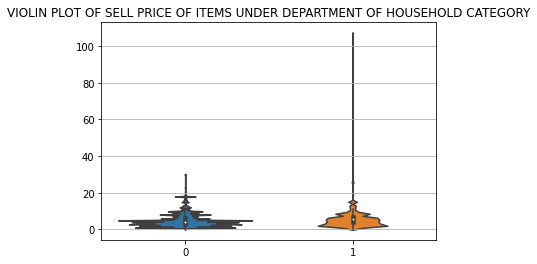

In [ ]:
plt.figure()
plt.grid()
plt.title("VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER DEPARTMENT OF HOUSEHOLD CATEGORY")

sns.violinplot(data=[sp_household1,sp_household2])


plt.show()
plt.close()

##**CONCLUSIONS FROM THE VIOLIN PLOT OF SELL PRICE OF ITEMS UNDER DEPARTMENT OF HOUSEHOLD CATEGORY-**
    1.PRICE DISTRIBUTION IS NOT SAME
    2.MEAN PRICE OF ITEMS UNDER HOUSEHOLD_! IS LESS..AND THUS THE SALES UNDER FOOD_3 ARE HIGHER..SINCE LESS SELLING PRICE TEND TO MAKE SALE HIGH 

